# Project Overview

- This project aims to analyze and predict depression cases based on a dataset containing information from students, such as age, dietary habits, academic pressure levels, sleep quality, and other factors related to psychological well-being. The focus is to build machine learning models capable of identifying patterns that indicate the likelihood of a person developing depression, aiming to provide insights that could be useful for early interventions and psychological support. The project will involve data cleaning and preprocessing, exploratory data analysis, feature engineering, analyzing relationships between variables, followed by the implementation of predictive models.

# Dataset Features Overview: Mental Health and Lifestyle Variables

| **Variable**                              | **Meaning**                                           |
|-------------------------------------------|-------------------------------------------------------|
| id                                        | ID                                                    |
| Gender                                    | Gender                                                |
| Age                                       | Age                                                   |
| City                                      | City                                                  |
| Profession                                | Profession                                            |
| Academic Pressure                         | Academic Pressure                                     |
| Work Pressure                             | Work Pressure                                         |
| CGPA                                      | Cumulative Grade Point Average                        |
| Study Satisfaction                        | Study Satisfaction                                    |
| Job Satisfaction                          | Job Satisfaction                                      |
| Sleep Duration                            | Sleep Duration                                        |
| Dietary Habits                            | Dietary Habits                                        |
| Degree                                    | Degree (or Educational Level)                         |
| Have you ever had suicidal thoughts?      | Have you ever had suicidal thoughts?                  |
| Work/Study Hours                          | Work/Study Hours                                      |
| Financial Stress                          | Financial Stress                                      |
| Family History of Mental Illness          | Family History of Mental Illness                      |
| Depression                                | Depression                                            |


# Dataset Overview

In [177]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="dark")

In [93]:
df = pd.read_csv("Student Depression Dataset.csv")

In [94]:
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.00,Visakhapatnam,Student,5.00,0.00,8.97,2.00,0.00,5-6 hours,Healthy,B.Pharm,Yes,3.00,1.00,No,1
1,8,Female,24.00,Bangalore,Student,2.00,0.00,5.90,5.00,0.00,5-6 hours,Moderate,BSc,No,3.00,2.00,Yes,0
2,26,Male,31.00,Srinagar,Student,3.00,0.00,7.03,5.00,0.00,Less than 5 hours,Healthy,BA,No,9.00,1.00,Yes,0
3,30,Female,28.00,Varanasi,Student,3.00,0.00,5.59,2.00,0.00,7-8 hours,Moderate,BCA,Yes,4.00,5.00,Yes,1
4,32,Female,25.00,Jaipur,Student,4.00,0.00,8.13,3.00,0.00,5-6 hours,Moderate,M.Tech,Yes,1.00,1.00,No,0


In [95]:
df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
27896,140685,Female,27.00,Surat,Student,5.00,0.00,5.75,5.00,0.00,5-6 hours,Unhealthy,Class 12,Yes,7.00,1.00,Yes,0
27897,140686,Male,27.00,Ludhiana,Student,2.00,0.00,9.40,3.00,0.00,Less than 5 hours,Healthy,MSc,No,0.00,3.00,Yes,0
27898,140689,Male,31.00,Faridabad,Student,3.00,0.00,6.61,4.00,0.00,5-6 hours,Unhealthy,MD,No,12.00,2.00,No,0
27899,140690,Female,18.00,Ludhiana,Student,5.00,0.00,6.88,2.00,0.00,Less than 5 hours,Healthy,Class 12,Yes,10.00,5.00,No,1
27900,140699,Male,27.00,Patna,Student,4.00,0.00,9.24,1.00,0.00,Less than 5 hours,Healthy,BCA,Yes,2.00,3.00,Yes,1


In [96]:
df.shape

(27901, 18)

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [98]:
df.isnull().sum()

id                                       0
Gender                                   0
Age                                      0
City                                     0
Profession                               0
Academic Pressure                        0
Work Pressure                            0
CGPA                                     0
Study Satisfaction                       0
Job Satisfaction                         0
Sleep Duration                           0
Dietary Habits                           0
Degree                                   0
Have you ever had suicidal thoughts ?    0
Work/Study Hours                         0
Financial Stress                         3
Family History of Mental Illness         0
Depression                               0
dtype: int64

In [99]:
df.describe()

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress,Depression
count,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27901.00,27898.00,27901.00
mean,70442.15,25.82,3.14,0.00,7.66,2.94,0.00,7.16,3.14,0.59
std,40641.18,4.91,1.38,0.04,1.47,1.36,0.04,3.71,1.44,0.49
min,2.00,18.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
25%,35039.00,21.00,2.00,0.00,6.29,2.00,0.00,4.00,2.00,0.00
50%,70684.00,25.00,3.00,0.00,7.77,3.00,0.00,8.00,3.00,1.00
75%,105818.00,30.00,4.00,0.00,8.92,4.00,0.00,10.00,4.00,1.00
max,140699.00,59.00,5.00,5.00,10.00,5.00,4.00,12.00,5.00,1.00


In [100]:
df.describe(include="object")

,Gender,City,Profession,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Family History of Mental Illness
count,27901,27901,27901,27901,27901,27901,27901,27901
unique,2,52,14,5,4,28,2,2
top,Male,Kalyan,Student,Less than 5 hours,Unhealthy,Class 12,Yes,No
freq,15547,1570,27870,8310,10317,6080,17656,14398


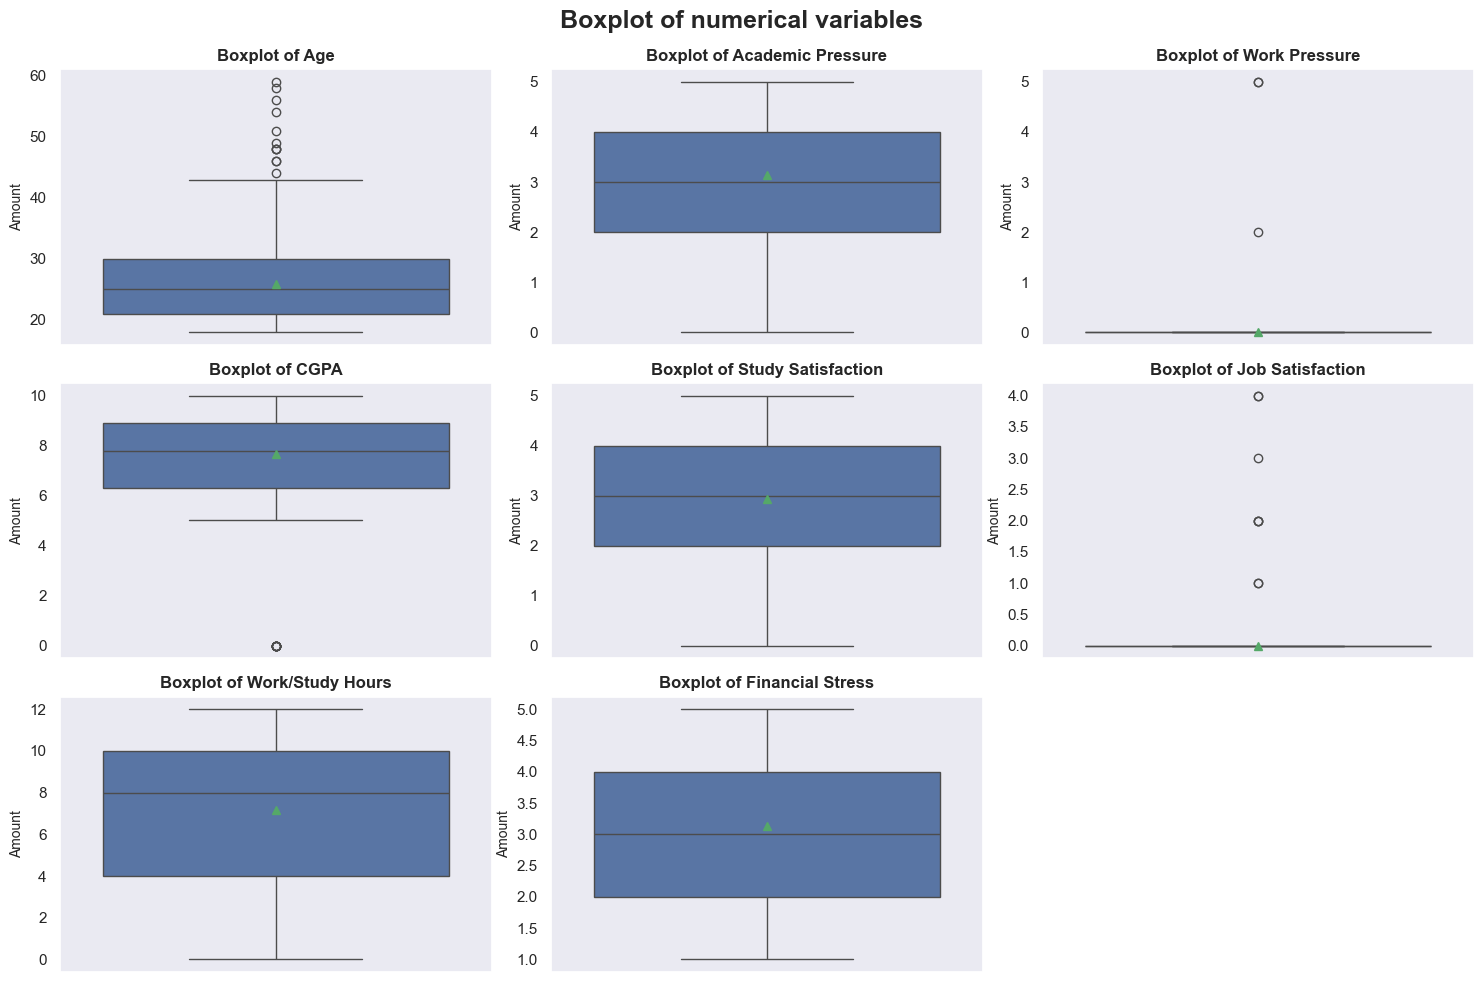

In [101]:
numerics = df.select_dtypes(include="number").drop(columns=["Depression", "id"], axis=1)

fig, ax = plt.subplots(3,3,figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(numerics):
    sns.boxplot(df, y=col, ax=ax[i], showmeans=True)
    ax[i].set_title(f'Boxplot of {col}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel("")
    ax[i].set_ylabel('Amount', fontsize=10)
    ax[i].grid(False)
    
for j in range(len(numerics.columns), len(ax)):
    fig.delaxes(ax[j])

plt.suptitle("Boxplot of numerical variables", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

In [102]:
for i in df.columns:
        print(f'{df[i].name} --> unique count: {df[i].nunique()}')
        print(f'unique values: {df[i].unique()}')
        print('-' * 90)

id --> unique count: 27901
unique values: [     2      8     26 ... 140689 140690 140699]
------------------------------------------------------------------------------------------
Gender --> unique count: 2
unique values: ['Male' 'Female']
------------------------------------------------------------------------------------------
Age --> unique count: 34
unique values: [33. 24. 31. 28. 25. 29. 30. 27. 19. 20. 23. 18. 21. 22. 34. 32. 26. 39.
 35. 42. 36. 58. 49. 38. 51. 44. 43. 46. 59. 54. 48. 56. 37. 41.]
------------------------------------------------------------------------------------------
City --> unique count: 52
unique values: ['Visakhapatnam' 'Bangalore' 'Srinagar' 'Varanasi' 'Jaipur' 'Pune' 'Thane'
 'Chennai' 'Nagpur' 'Nashik' 'Vadodara' 'Kalyan' 'Rajkot' 'Ahmedabad'
 'Kolkata' 'Mumbai' 'Lucknow' 'Indore' 'Surat' 'Ludhiana' 'Bhopal'
 'Meerut' 'Agra' 'Ghaziabad' 'Hyderabad' 'Vasai-Virar' 'Kanpur' 'Patna'
 'Faridabad' 'Delhi' 'Saanvi' 'M.Tech' 'Bhavna' 'Less Delhi' 'City' '3.0'


# Data Cleaning and Preprocessing

In this section, we perform essential steps to clean and preprocess the dataset for further analysis. 

In [103]:
df.loc[df["Financial Stress"].isnull()] = int(df["Financial Stress"].mean())

In [104]:
df["Financial Stress"].value_counts()

Financial Stress
5.00    6715
4.00    5775
3.00    5229
1.00    5121
2.00    5061
Name: count, dtype: int64

In [105]:
df.drop(columns=["id"], axis=1, inplace=True)

In [106]:
group = df.groupby("City")["Depression"].count().reset_index()

valid_cities = group[group.Depression >=5]["City"]

df = df[df["City"].isin(valid_cities)]

In [107]:
df.shape

(27872, 17)

# Exploratory Data Analysis (EDA)

Uncovering Insights from the Dataset

### Target Variable

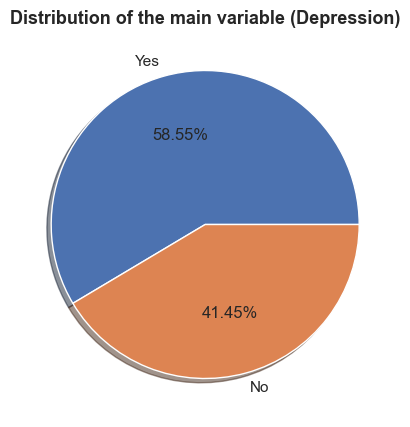

In [108]:
plt.figure(figsize=(12,5))
plt.pie(x=df.Depression.value_counts(), labels=["Yes", "No"],shadow=True, autopct='%0.2f%%')
plt.title("Distribution of the main variable (Depression)", fontsize=13, fontweight="bold")
plt.show()

### Numerical Variables

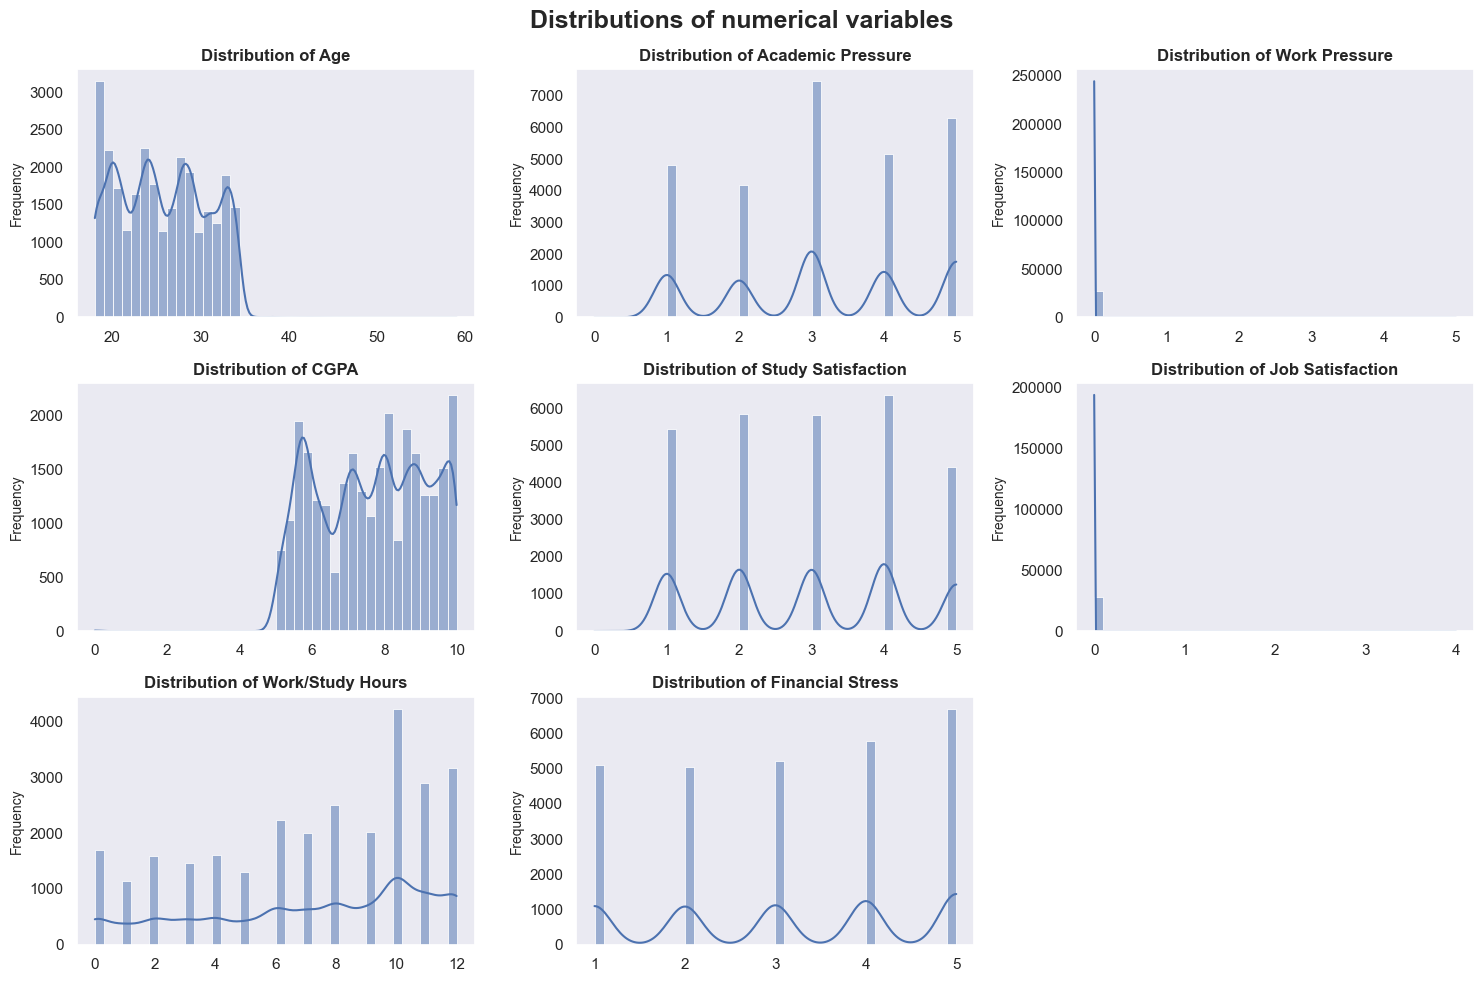

In [109]:
fig, ax = plt.subplots(3,3,figsize=(15,10))
ax = ax.flatten()

for i, col in enumerate(numerics):
    sns.histplot(df, x=col, bins=40, ax=ax[i], kde=True)
    ax[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel("")
    ax[i].set_ylabel('Frequency', fontsize=10)
    ax[i].grid(False)

for j in range(len(numerics.columns), len(ax)):
    fig.delaxes(ax[j])
    
plt.suptitle("Distributions of numerical variables", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

In [110]:
df["Job Satisfaction"].value_counts()

Job Satisfaction
0.00    27864
2.00        3
4.00        2
1.00        2
3.00        1
Name: count, dtype: int64

In [111]:
df["Work Pressure"].value_counts()

Work Pressure
0.00    27869
5.00        2
2.00        1
Name: count, dtype: int64

- Upon examining the histogram of these variables, we observe that nearly 100% of the cases indicate the absence of work pressure and job dissatisfaction. This suggests that most individuals in the dataset likely do not have a job. However, we will not discard these variables at this stage, as they may hold valuable information for the model in a specific subset of cases. A more detailed analysis will be conducted later to assess their true relevance.

### Categoricals Variables

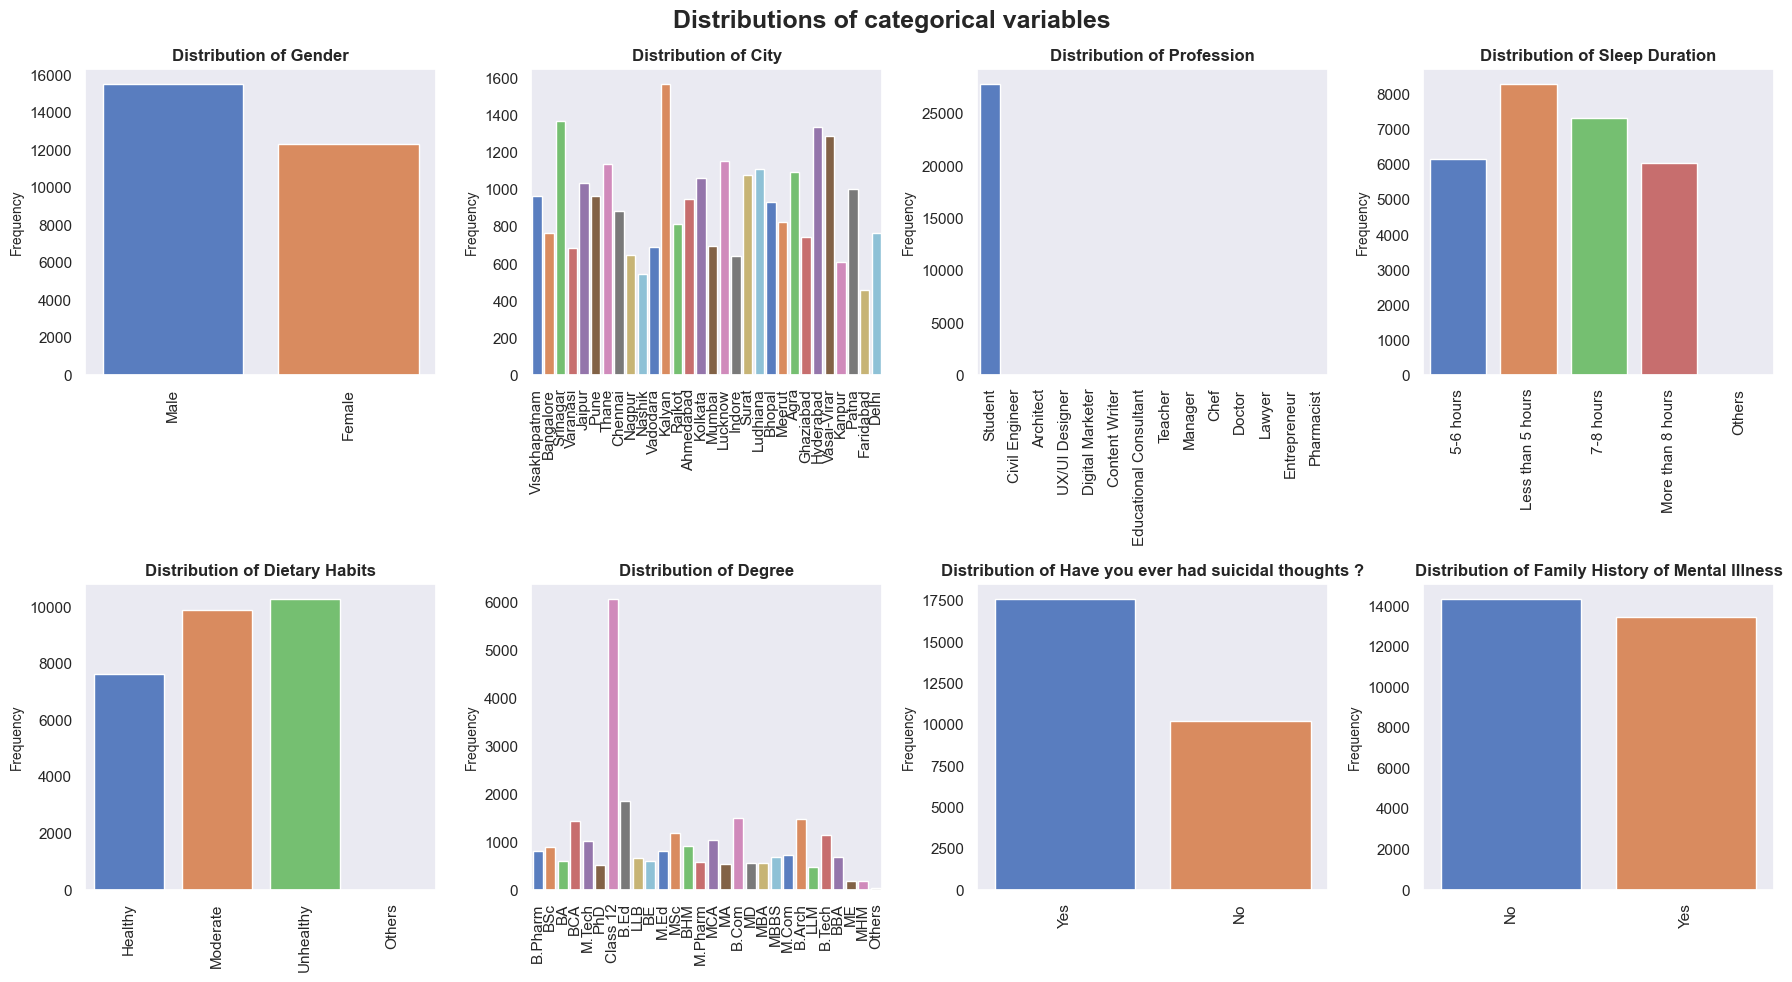

In [112]:
categories = df.select_dtypes(include="object")

fig, ax = plt.subplots(2, 4, figsize=(18, 10))
ax = ax.flatten()

for i, col in enumerate(categories.columns):
    sns.countplot(data=df, x=col, ax=ax[i], palette="muted")
    ax[i].set_title(f'Distribution of {col}', fontsize=12, fontweight='bold')
    ax[i].set_xlabel('')
    ax[i].set_ylabel('Frequency', fontsize=10)
    ax[i].tick_params(axis='x', rotation=90)

plt.suptitle("Distributions of categorical variables", fontsize=18, fontweight="bold")
plt.tight_layout()
plt.show()

In [113]:
df.Profession.value_counts()

Profession
Student                   27841
Architect                     8
Teacher                       6
Digital Marketer              3
Content Writer                2
Chef                          2
Doctor                        2
Pharmacist                    2
Civil Engineer                1
UX/UI Designer                1
Educational Consultant        1
Manager                       1
Lawyer                        1
Entrepreneur                  1
Name: count, dtype: int64

- As expected, the vast majority of our cases consist of students, accounting for nearly 100% of the data. Since our primary focus is on identifying depression among students, work-related variables, such as profession, may be considered irrelevant for the main analysis.

In [114]:
df = df.drop(columns=["Job Satisfaction", "Work Pressure", "Profession"], axis=1)

## Relationships Between Variables and the Target

### Gender and Depression

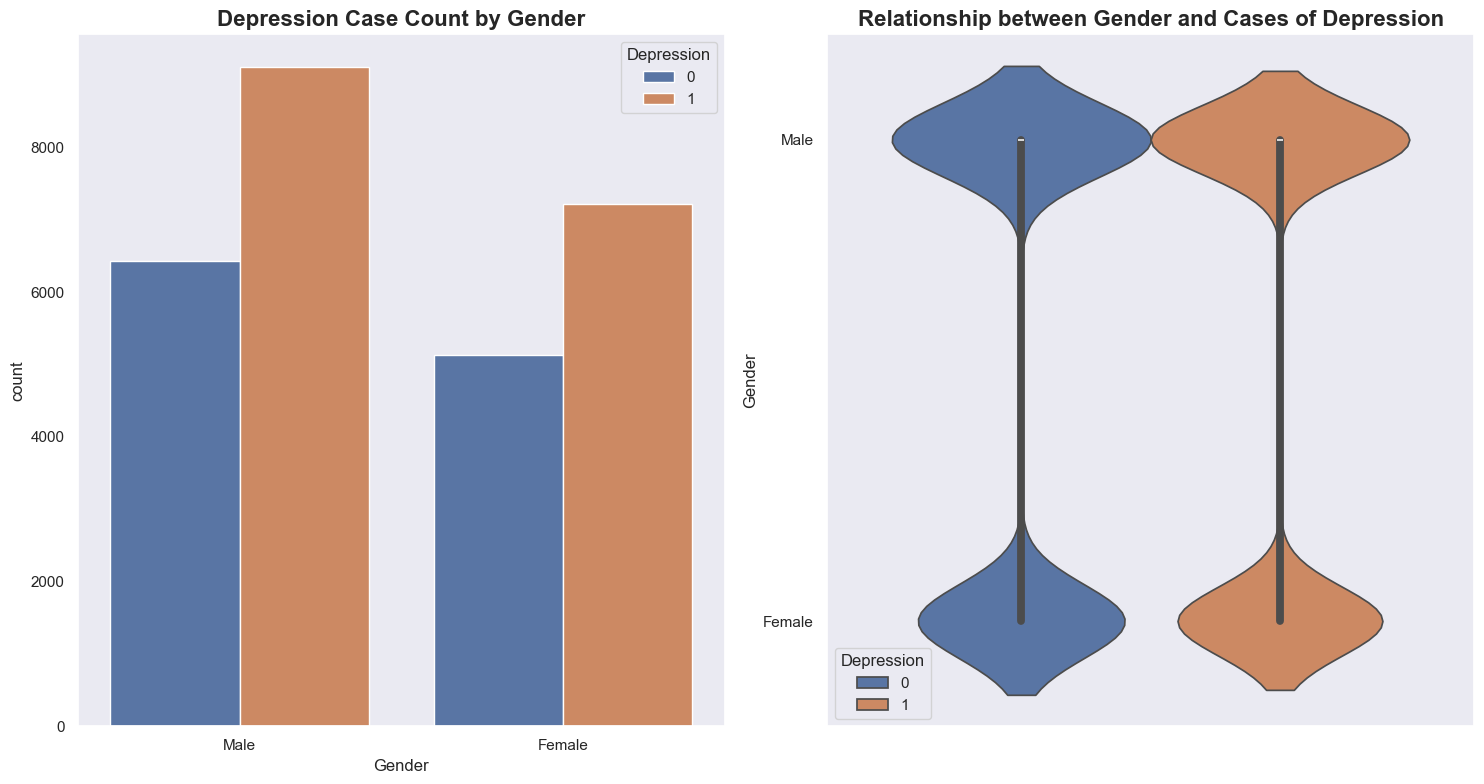

In [115]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

plots = [
    (sns.countplot, {"x": "Gender", "hue": "Depression"}, "Depression Case Count by Gender"),
    (sns.violinplot, {"y": "Gender", "hue": "Depression"}, "Relationship between Gender and Cases of Depression"),
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(data=df, ax=ax[i], **kwargs)
    ax[i].set_title(title, fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

- Gender: **Minimal Impact on Depression**

### Age and Depression

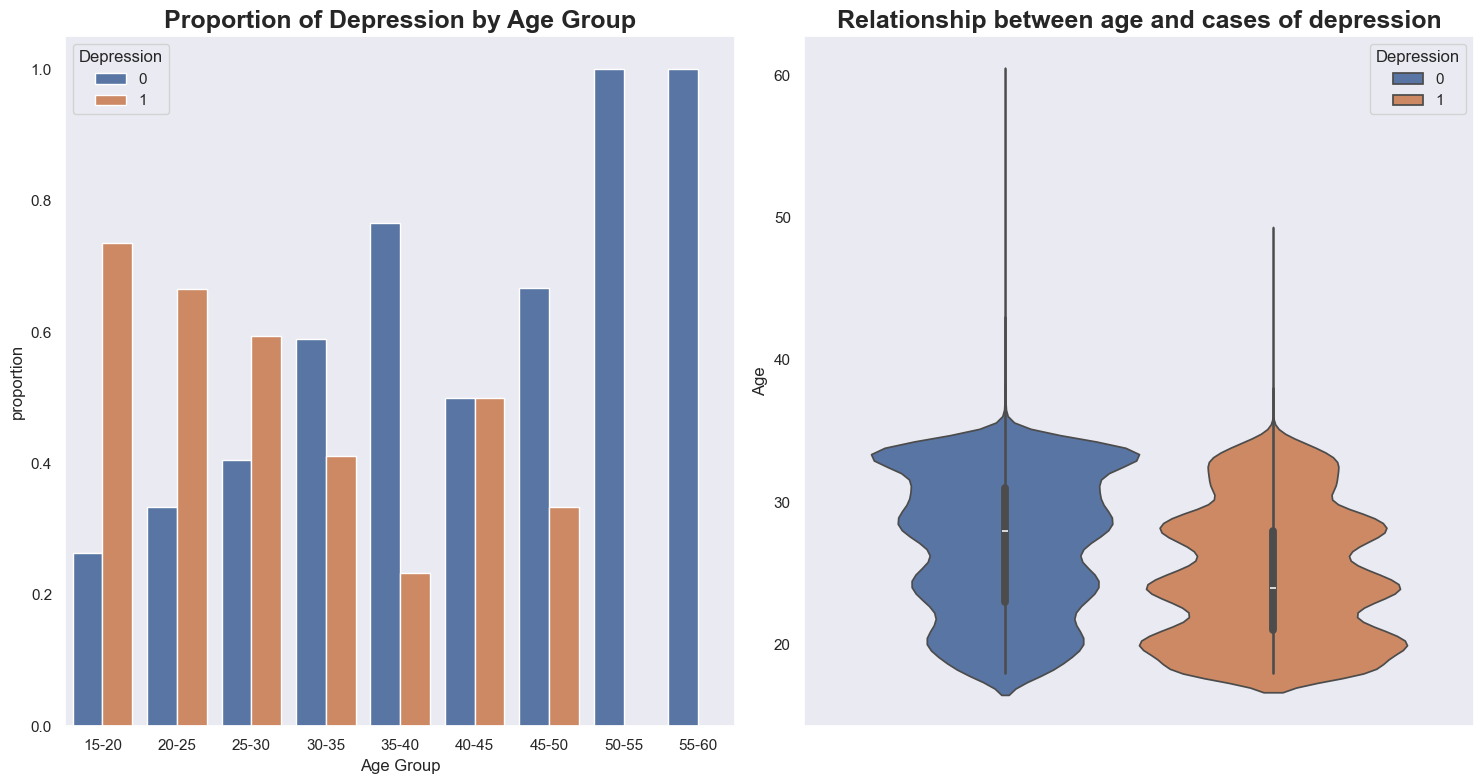

In [116]:
bins = [15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ["15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"]

df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
prop_df = df.groupby(["Age Group", "Depression"]).size().reset_index(name='count')
prop_df["proportion"] = prop_df["count"] / prop_df.groupby("Age Group")["count"].transform("sum")

fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.barplot(data=prop_df, x="Age Group", y="proportion", hue="Depression",ax=ax[0])
ax[0].set_title("Proportion of Depression by Age Group", fontsize=18, fontweight="bold")

sns.violinplot(data=df, y="Age", hue="Depression",ax=ax[1])
ax[1].set_title("Relationship between age and cases of depression",fontsize=18,fontweight="bold")
plt.tight_layout()  
plt.show()

- Age: **Younger Individuals Show Higher Likelihood of Depression. We observed a trend indicating that younger individuals are more likely to experience depression. This was confirmed by the graph, which shows a higher proportion of people without depression in age groups above 30.**

### City and Depression

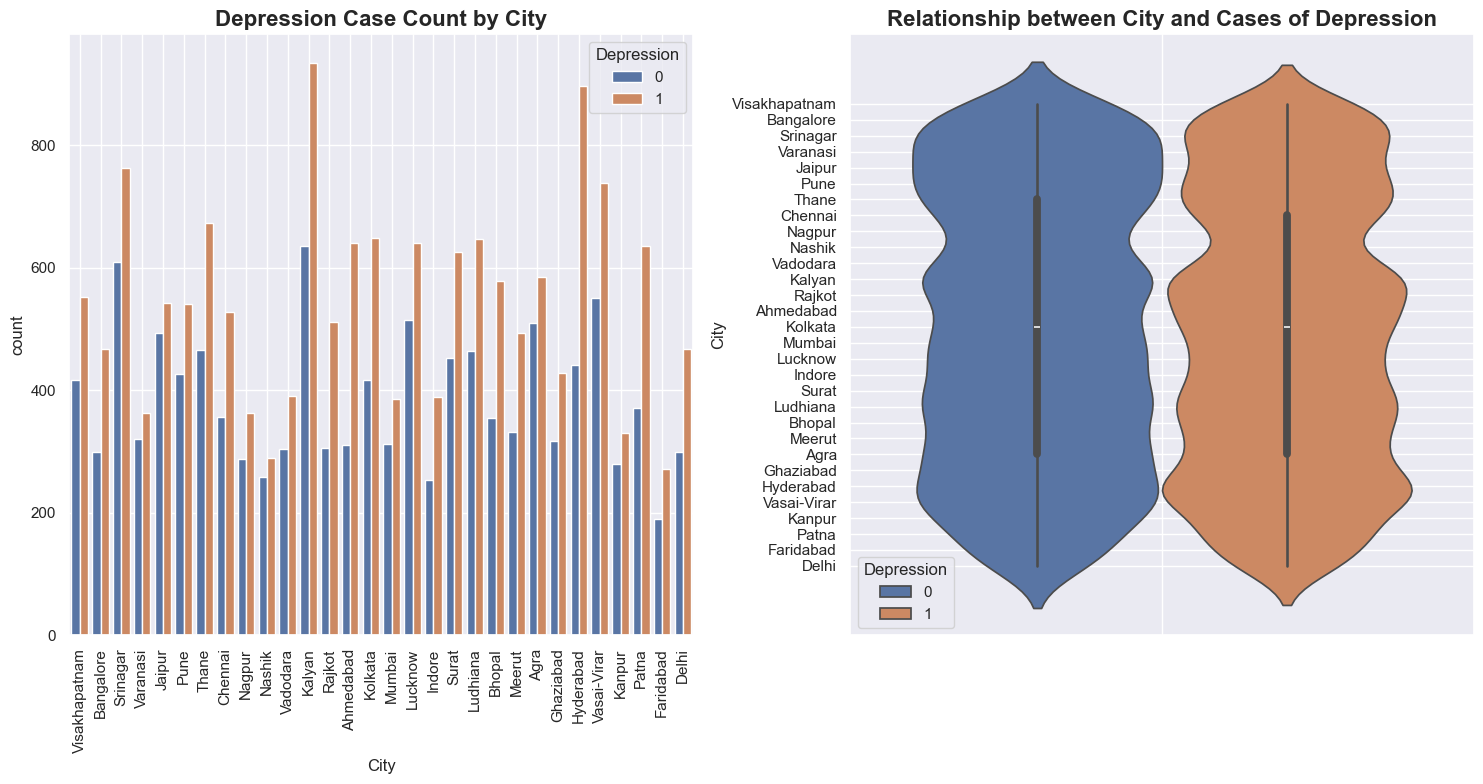

In [117]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

plots = [
    (sns.countplot, {"x": "City", "hue": "Depression"}, "Depression Case Count by City"),
    (sns.violinplot, {"y": "City", "hue": "Depression"}, "Relationship between City and Cases of Depression"),
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(data=df, ax=ax[i], **kwargs)
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    ax[i].tick_params(axis="x",rotation=90)
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

- City: **Some Cities Show Higher Depression Levels, but No Clear Pattern Identified. When analyzing the data by city, we observe that some cities have significantly higher levels of depression compared to others. However, no clear pattern emerges, and the variation between cities does not suggest any definitive correlation with the presence of depression.**

### Academic Pressure and Depression

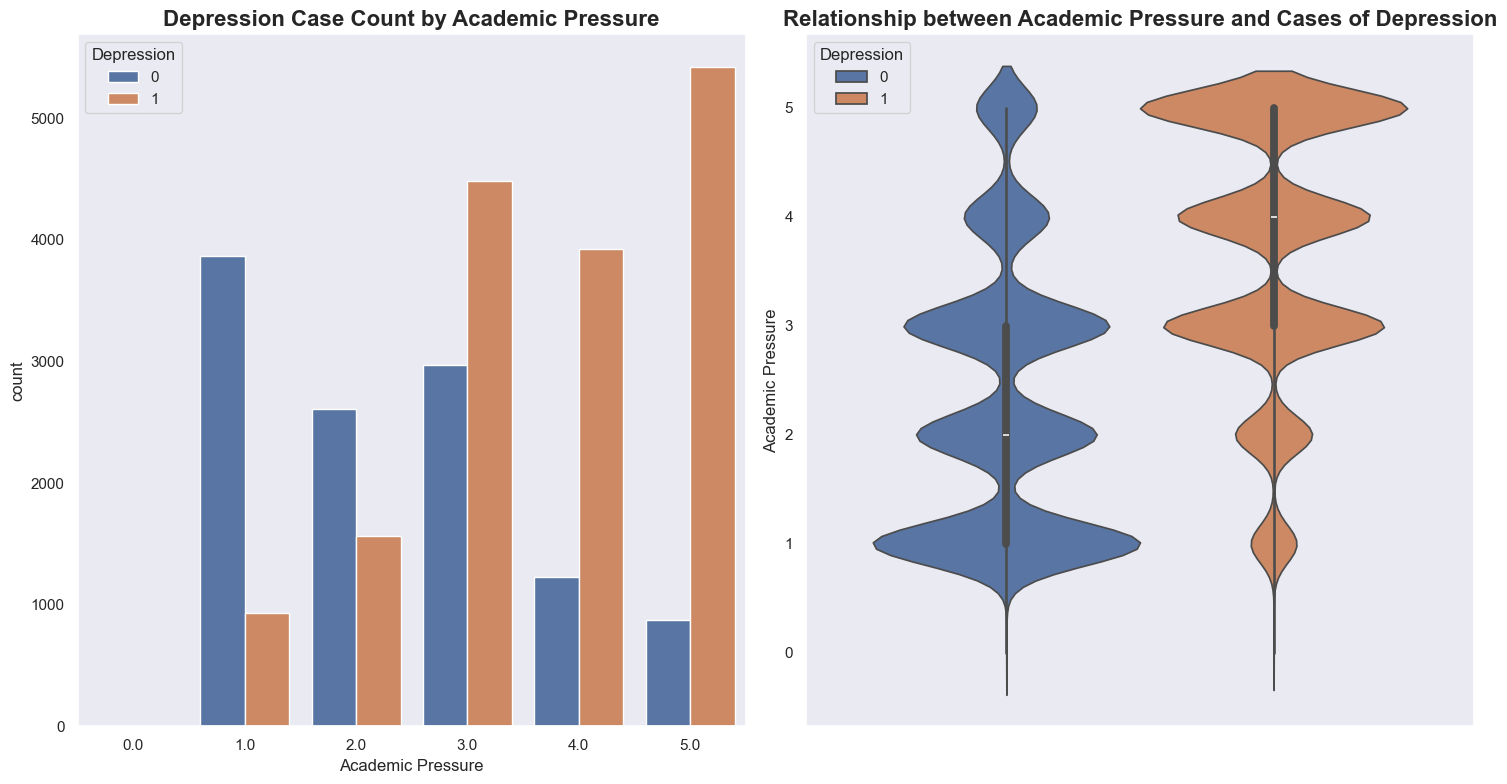

In [118]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

plots = [
    (sns.countplot, {"x": "Academic Pressure", "hue": "Depression"}, "Depression Case Count by Academic Pressure"),
    (sns.violinplot, {"y": "Academic Pressure", "hue": "Depression"}, "Relationship between Academic Pressure and Cases of Depression"),
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(data=df, ax=ax[i], **kwargs)
    ax[i].set_title(title, fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()


- Academic Pressure: **We noticed a trend that the more academic pressure a person faces, the higher the chance of experiencing depression.**

### CGPA and Depression

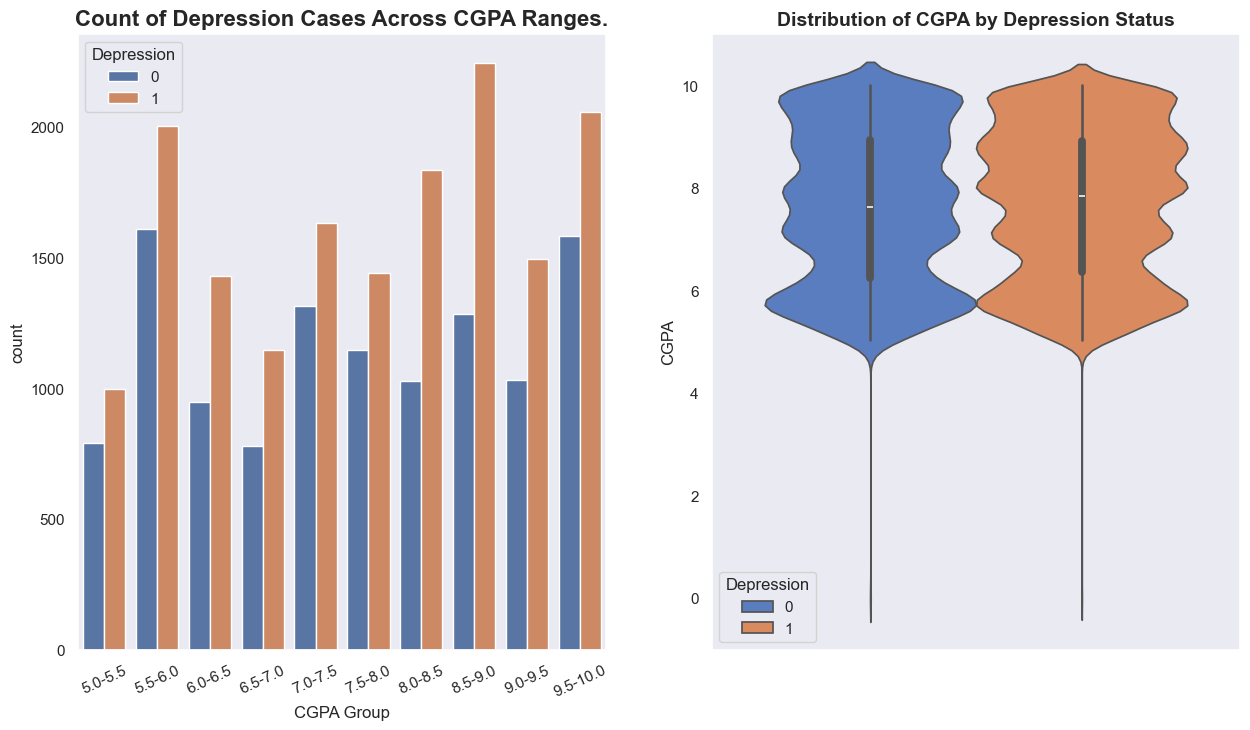

In [119]:
bins = [i for i in np.arange(5, 10.5, 0.5)]  
labels = [f"{i}-{i+0.5}" for i in np.arange(5, 10, 0.5)] 
df['CGPA Group'] = pd.cut(df['CGPA'], bins=bins, labels=labels, right=False)

fig,ax = plt.subplots(1,2,figsize=(15,8))
sns.countplot(df, x="CGPA Group", hue="Depression",ax=ax[0])
ax[0].set_title("Count of Depression Cases Across CGPA Ranges.", fontsize=16, fontweight="bold")
ax[0].tick_params(axis="x",rotation=25)

sns.violinplot(data=df, y="CGPA", hue="Depression", palette="muted",ax=ax[1])
ax[1].set_title("Distribution of CGPA by Depression Status", fontsize=14, fontweight="bold")

plt.show()

- CGPA: **There is little relationship between CGPA and depression as both low CGPA and high CGPA students are facing depression. However, we observed a small increase in the level of depression among students with CGPA between 8.0 and 9.0.**

### Study Satisfaction and Depression

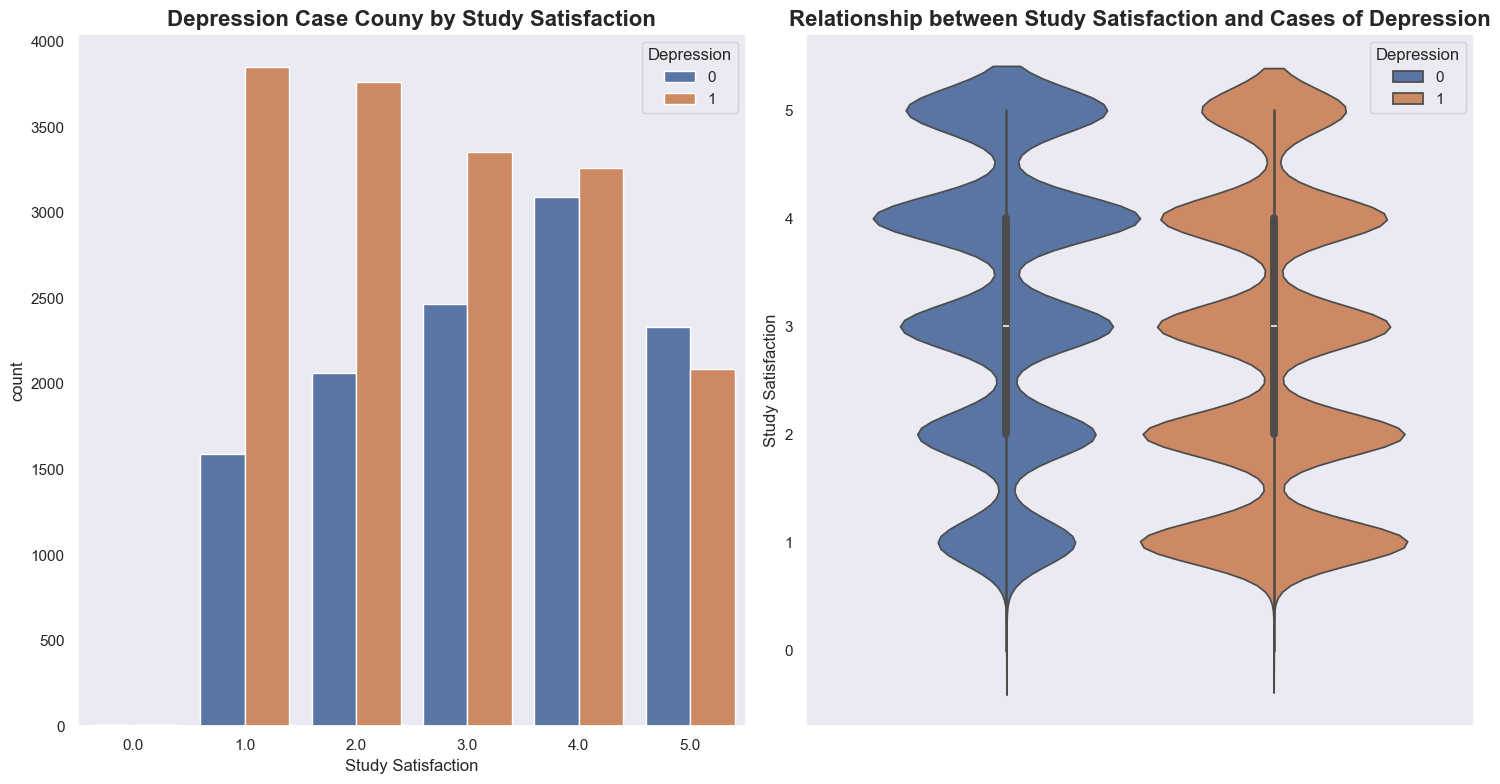

In [120]:
fig, ax = plt.subplots(1, 2, figsize=(15, 8))

plots = [
    (sns.countplot, {"x": "Study Satisfaction", "hue": "Depression"}, "Depression Case Couny by Study Satisfaction"),
    (sns.violinplot, {"y": "Study Satisfaction", "hue": "Depression"}, "Relationship between Study Satisfaction and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, ax=ax[i], **kwargs)
    ax[i].set_title(title, fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

- Study Satisfaction: **There is a small negative correlation between satisfaction with studies and depression, suggesting that the lower the satisfaction, the greater the likelihood of developing depression.**

### Sleep Duration and Depression

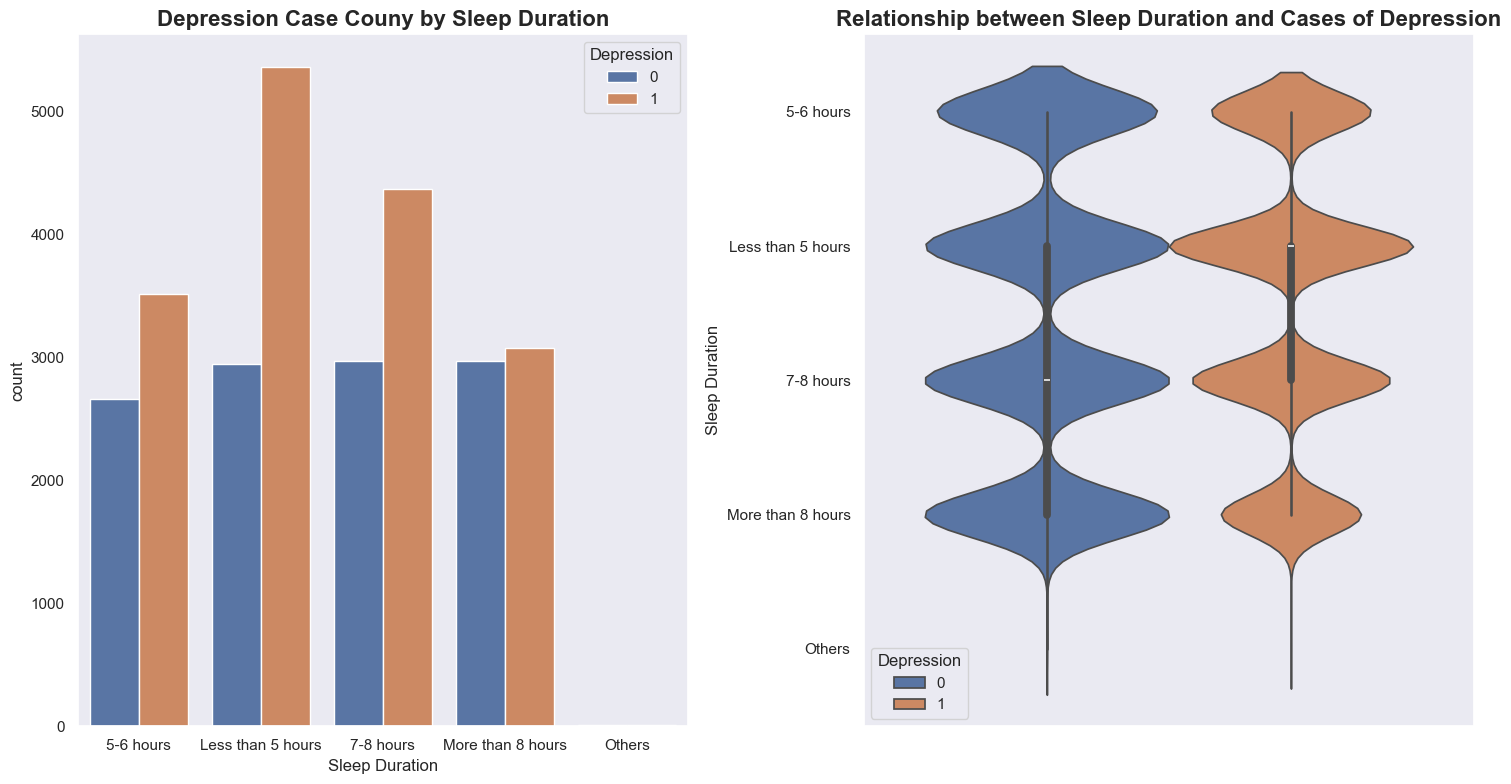

In [121]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots= [
    (sns.countplot, {"x" : "Sleep Duration", "hue" : "Depression"}, "Depression Case Couny by Sleep Duration"),
    (sns.violinplot, {"y" : "Sleep Duration", "hue" : "Depression"}, "Relationship between Sleep Duration and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(data = df, ax=ax[i], **kwargs)
    ax[i].set_title(title, fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

- Sleep Duration: **A small pattern suggests that people who sleep more than 8 hours tend to suffer less from depression. However, those who sleep between 7 and 8 hours, as well as those who sleep between 5 and 6 hours, have higher levels of depression, indicating that this variable does not have a clear or strong meaning in relation to depression.**

### Dietary Habits and Depression

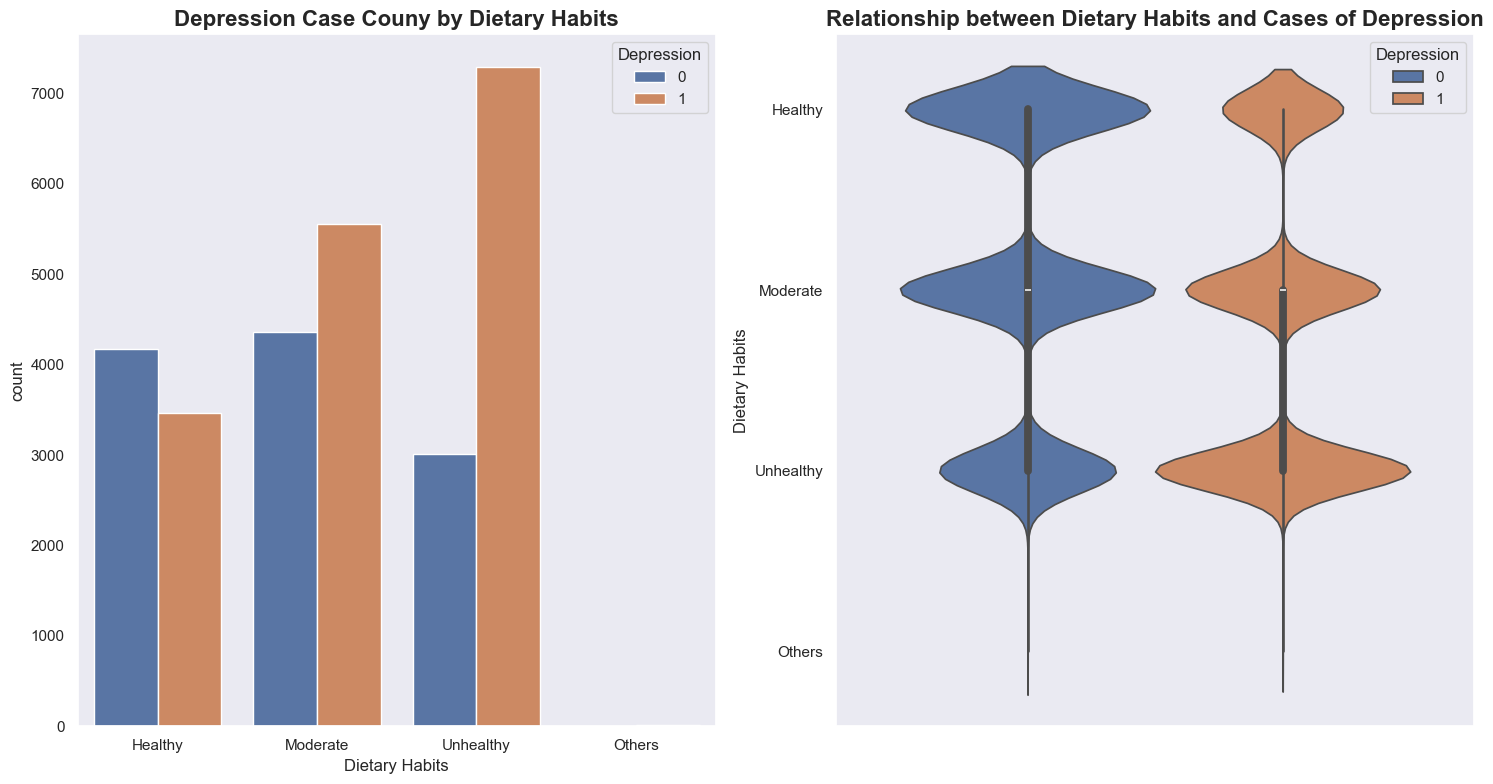

In [122]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Dietary Habits", "hue" : "Depression"}, "Depression Case Couny by Dietary Habits"),
    (sns.violinplot, {"y": "Dietary Habits", "hue" : "Depression"}, "Relationship between Dietary Habits and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    
plt.tight_layout()
plt.show()

- Dietary Habits: **We noticed that individuals with eating habits classified as "unhealthy" are much more likely to develop depression than those with eating habits considered healthier.**

### Degree and Depression

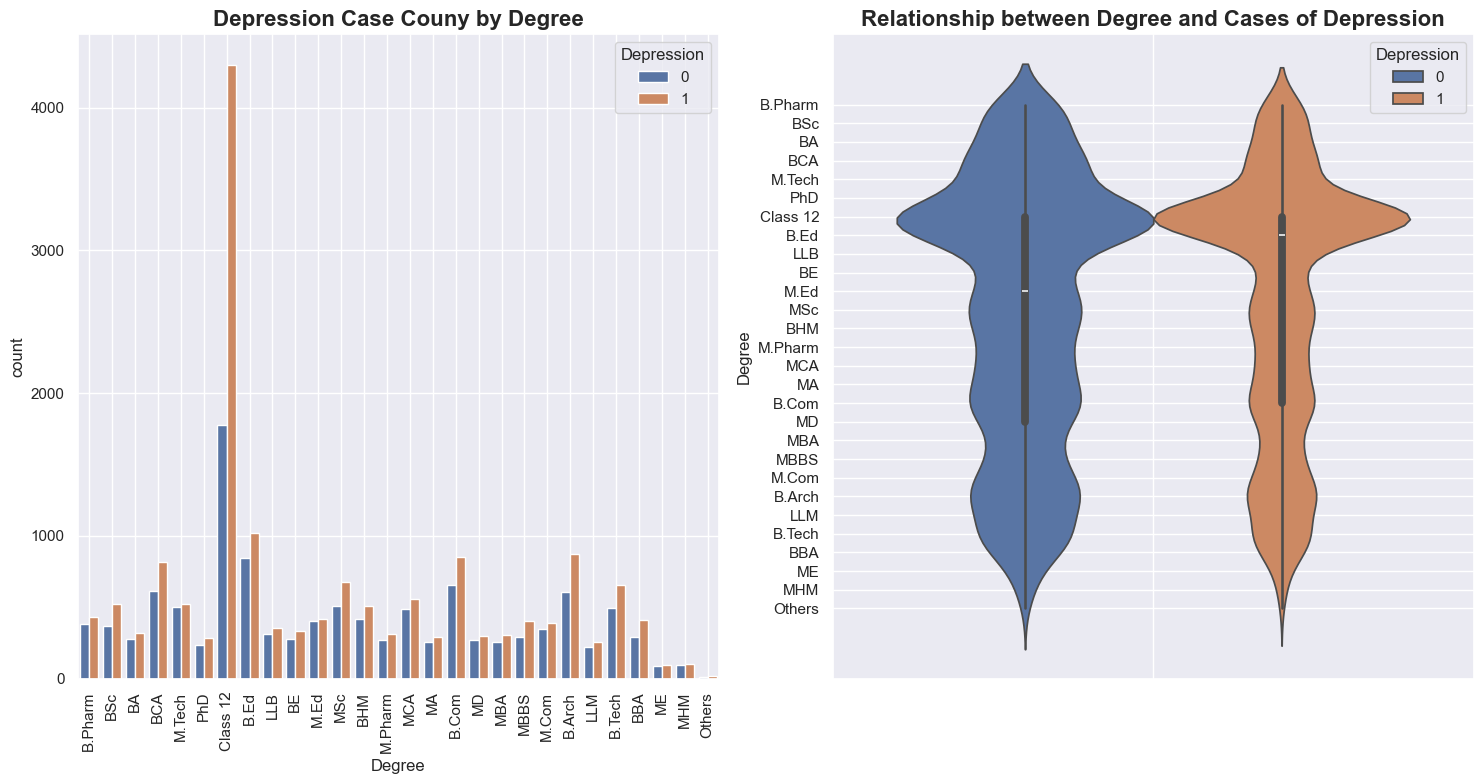

In [123]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Degree", "hue" : "Depression"}, "Depression Case Couny by Degree"),
    (sns.violinplot, {"y": "Degree", "hue" : "Depression"}, "Relationship between Degree and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    ax[i].tick_params(axis="x", rotation=90)
    ax[i].grid(True)
    
plt.tight_layout()
plt.show()

- Degree: **The "Class 12" class is much more likely to have depression than the others. This is mainly due to the fact that there are a significantly greater number of individuals in this class compared to the others.**

### Suicidal Thoughts and Depression

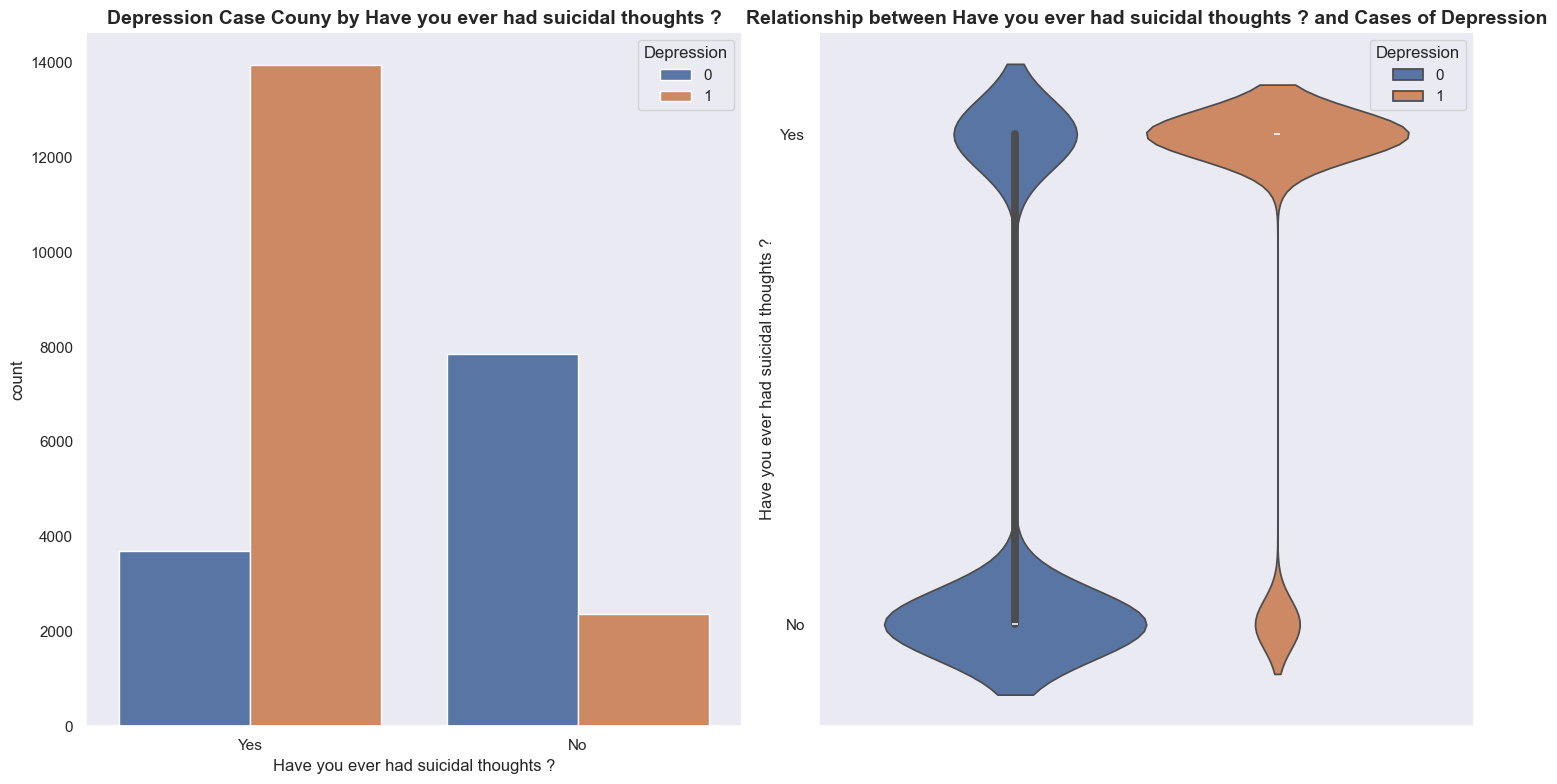

In [124]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Have you ever had suicidal thoughts ?", "hue" : "Depression"}, "Depression Case Couny by Have you ever had suicidal thoughts ?"),
    (sns.violinplot, {"y": "Have you ever had suicidal thoughts ?", "hue" : "Depression"}, "Relationship between Have you ever had suicidal thoughts ? and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=14, fontweight="bold")
    
plt.tight_layout()
plt.show()

- Suicidal Thoughts: **As expected, people who have suicidal thoughts are much more likely to develop depression than those who do not.**

### Work/Study Hours and Depression

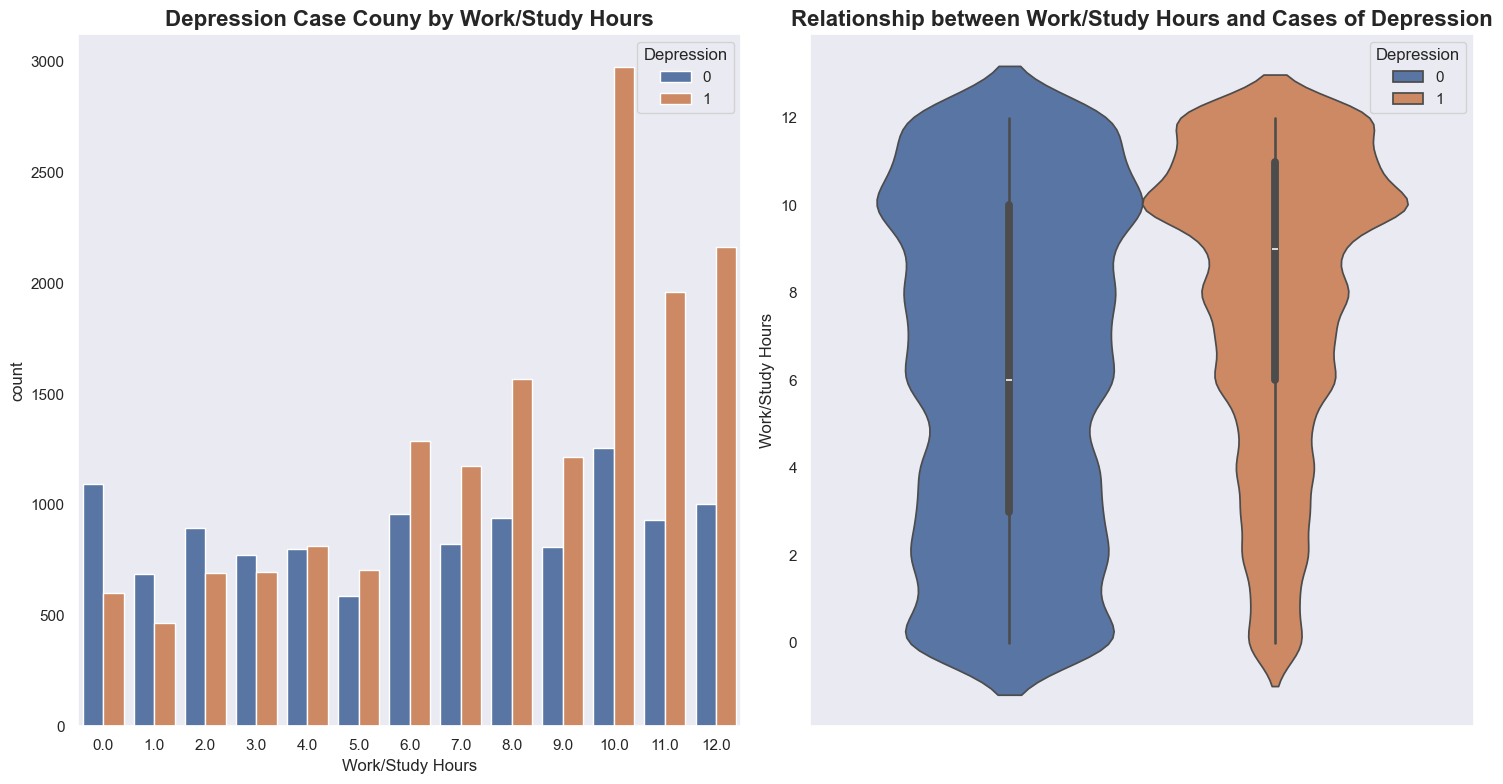

In [125]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Work/Study Hours", "hue" : "Depression"}, "Depression Case Couny by Work/Study Hours"),
    (sns.violinplot, {"y": "Work/Study Hours", "hue" : "Depression"}, "Relationship between Work/Study Hours and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    
plt.tight_layout()
plt.show()

- Work/Study Hours: **We noticed that individuals who work or study more than 6 hours a day are more likely to suffer from depression than those who work or study less. Additionally, those who work or study 10 hours or more a day are much more likely to develop depression.**

### Financial Stress and Depression

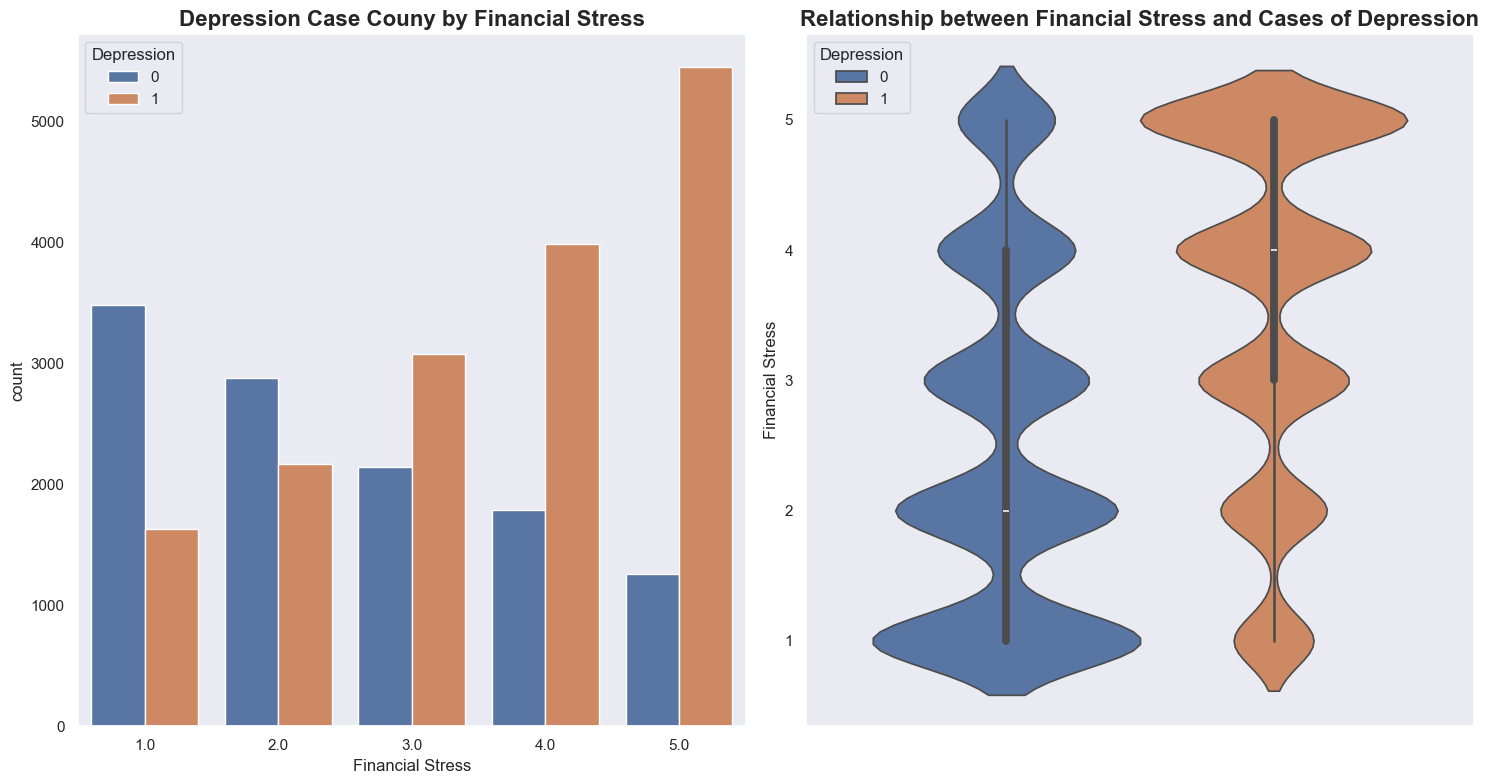

In [126]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Financial Stress", "hue" : "Depression"}, "Depression Case Couny by Financial Stress"),
    (sns.violinplot, {"y": "Financial Stress", "hue" : "Depression"}, "Relationship between Financial Stress and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    
plt.tight_layout()
plt.show()

- Financial Stress: **People who face high financial stress are much more likely to develop depression, while those with low financial stress are not prone to this illness.**

### Family History of Mental Illness and Depression

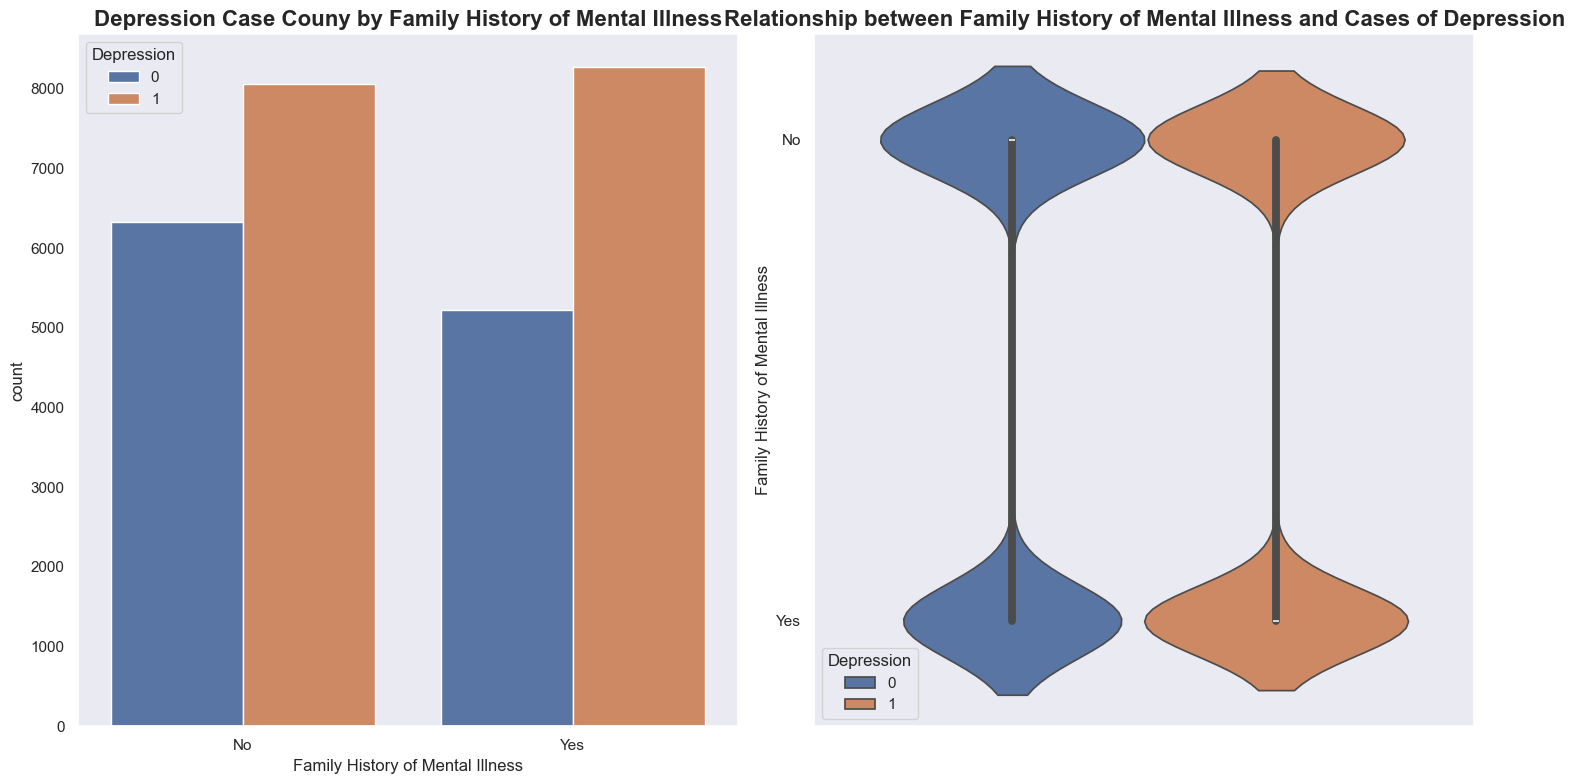

In [127]:
fig,ax = plt.subplots(1,2,figsize=(15,8))

plots = [
    (sns.countplot, {"x" : "Family History of Mental Illness", "hue" : "Depression"}, "Depression Case Couny by Family History of Mental Illness"),
    (sns.violinplot, {"y": "Family History of Mental Illness", "hue" : "Depression"}, "Relationship between Family History of Mental Illness and Cases of Depression")
]

for i, (plot_func, kwargs, title) in enumerate(plots):
    plot_func(df, **kwargs, ax=ax[i])
    ax[i].set_title(title, fontsize=16, fontweight="bold")
    
plt.tight_layout()
plt.show()

- Family History of Mental Illness: **Apparently, a family history of mental illness does not significantly impact the development of depression in an individual, as the results are practically the same, with a slight difference in the proportion of people without depression when the family has no history.**

In [128]:
#Dropando as colunas criadas para análise
df.drop(columns=["Age Group"],axis=1, inplace=True)
df.drop(columns=["CGPA Group"],axis=1, inplace=True)

### Relationship Between All Variables with Depression as Hue

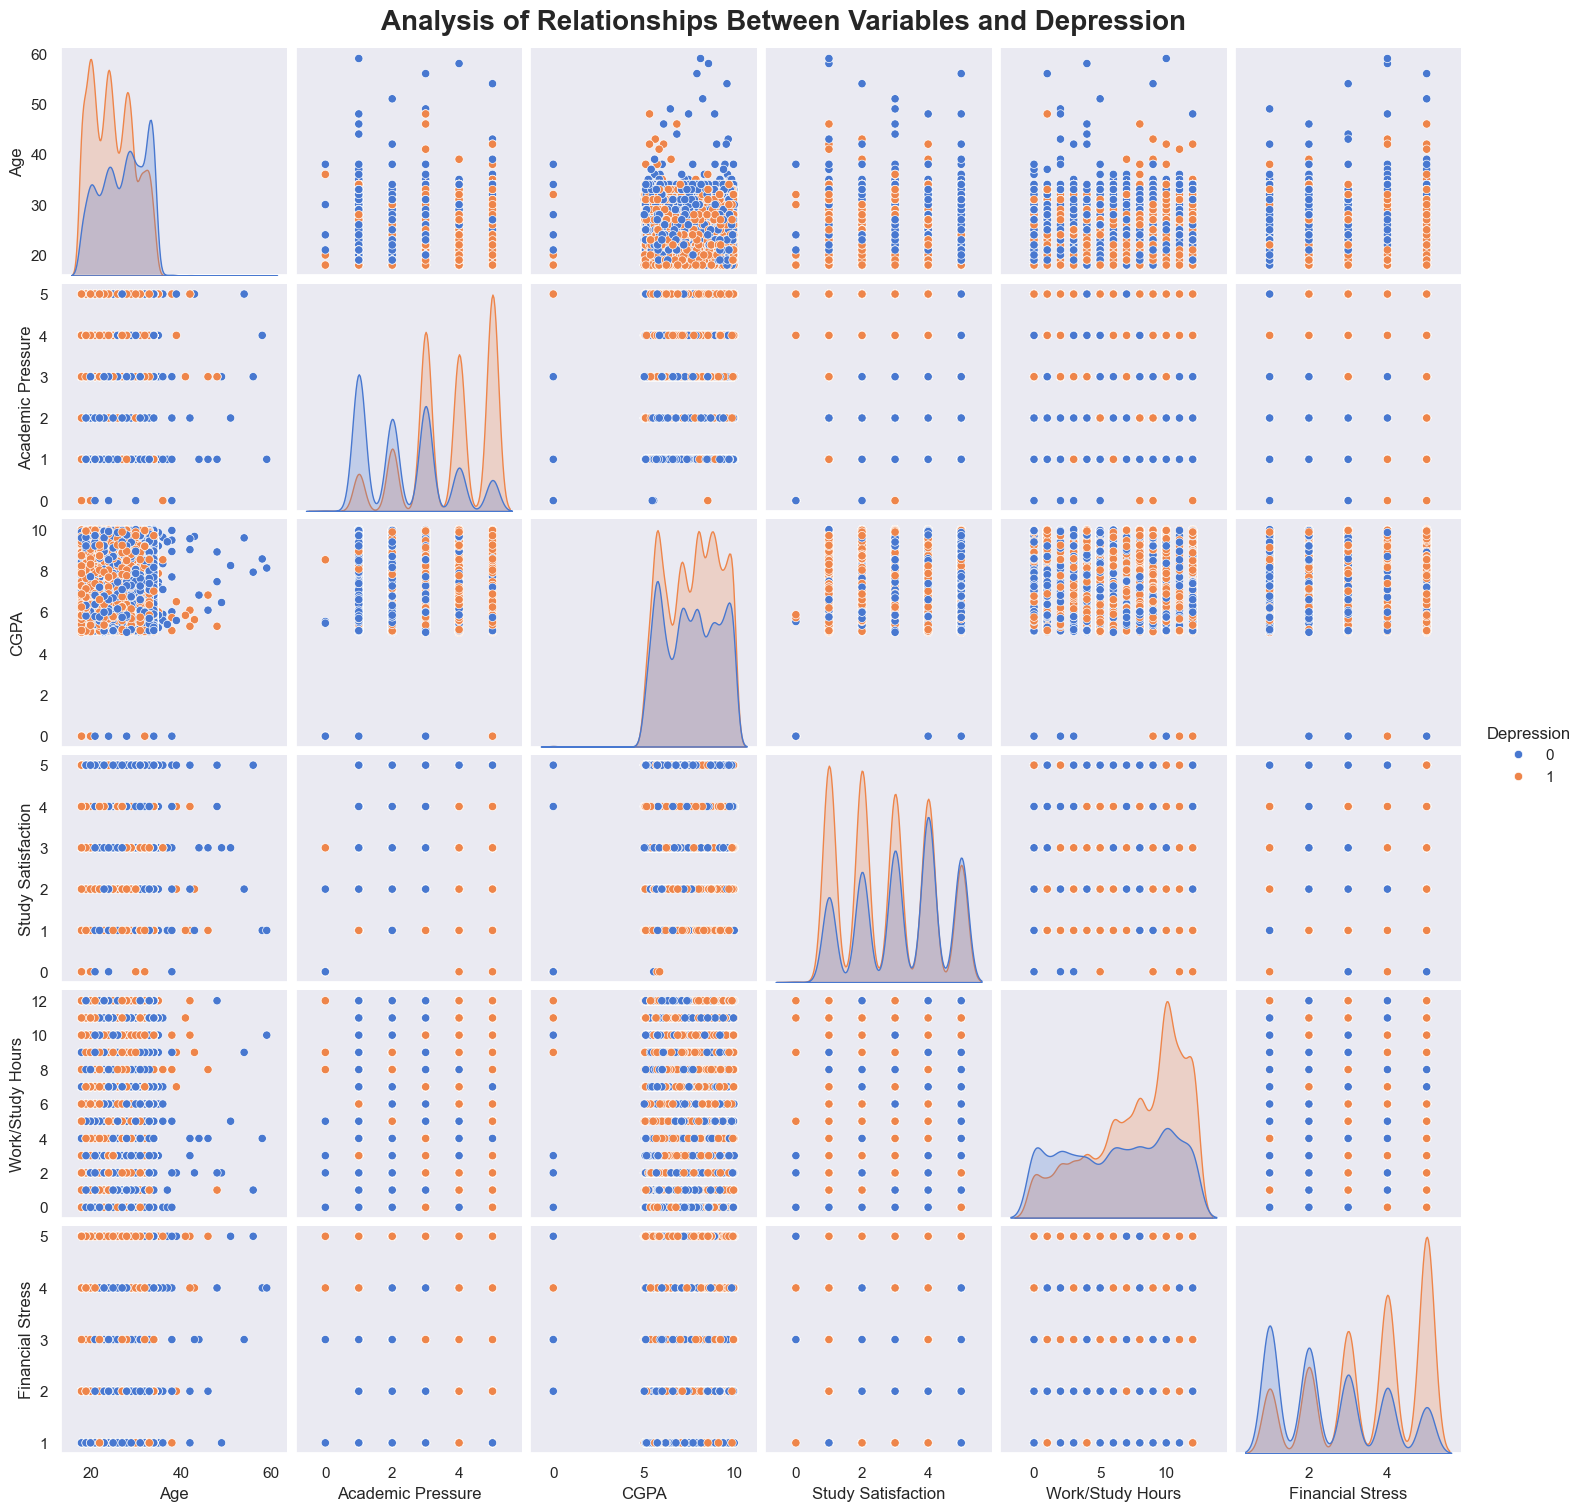

In [129]:
pairplot = sns.pairplot(df, hue="Depression", palette="muted")
pairplot.fig.suptitle("Analysis of Relationships Between Variables and Depression", y=1.01,
                      fontsize=20, fontweight="bold")
plt.show()

# Feature Enginer

## Transform Categorical Variables into Numeric Ones

In [130]:
from sklearn.preprocessing import LabelEncoder

In [131]:
le = LabelEncoder()
label_encoder = df.select_dtypes(include='object').columns

for i in label_encoder:
    df[i] = le.fit_transform(df[i])

df.head()

,Gender,Age,City,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,1,33.00,29,5.00,8.97,2.00,0,0,3,1,3.00,1.00,0,1
1,0,24.00,2,2.00,5.90,5.00,0,1,10,0,3.00,2.00,1,0
2,1,31.00,23,3.00,7.03,5.00,2,0,5,0,9.00,1.00,1,0
3,0,28.00,27,3.00,5.59,2.00,1,1,7,1,4.00,5.00,1,1
4,0,25.00,10,4.00,8.13,3.00,0,1,17,1,1.00,1.00,0,0


## Balancing the Target Variable
- Balancing the target variable helps the model treat both classes equally, improving its ability to predict both outcomes accurately.

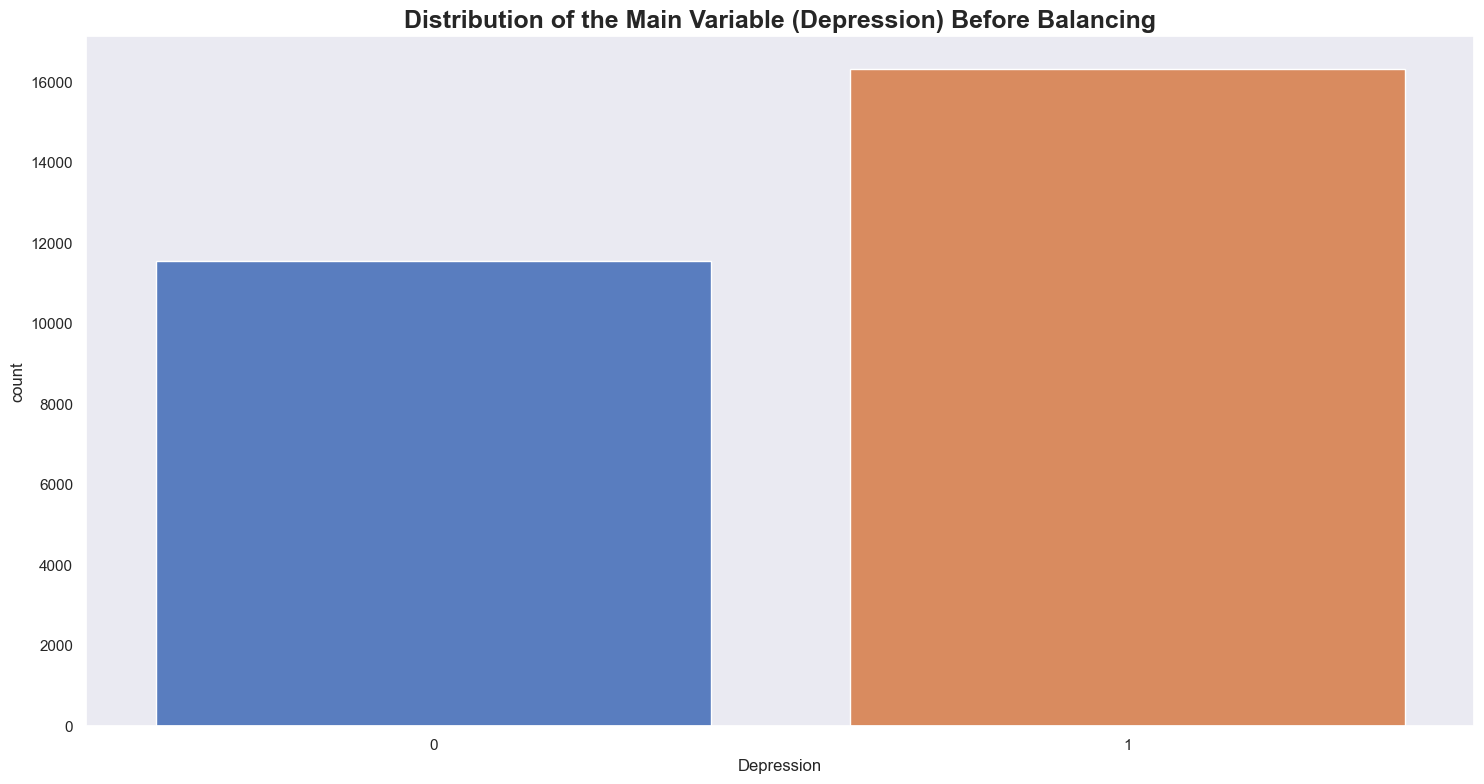

In [132]:
fig, ax = plt.subplots(figsize=(15,8))
sns.countplot(data=df, x="Depression", palette="muted")
ax.set_title("Distribution of the Main Variable (Depression) Before Balancing", fontsize=18,fontweight="bold")
plt.tight_layout()
plt.show()

In [133]:
from imblearn.over_sampling import SMOTE

In [134]:
smote = SMOTE()

x = df.drop(columns=["Depression"],axis=1)
y = df["Depression"]

X_resampled, y_resampled = smote.fit_resample(x,y)

df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

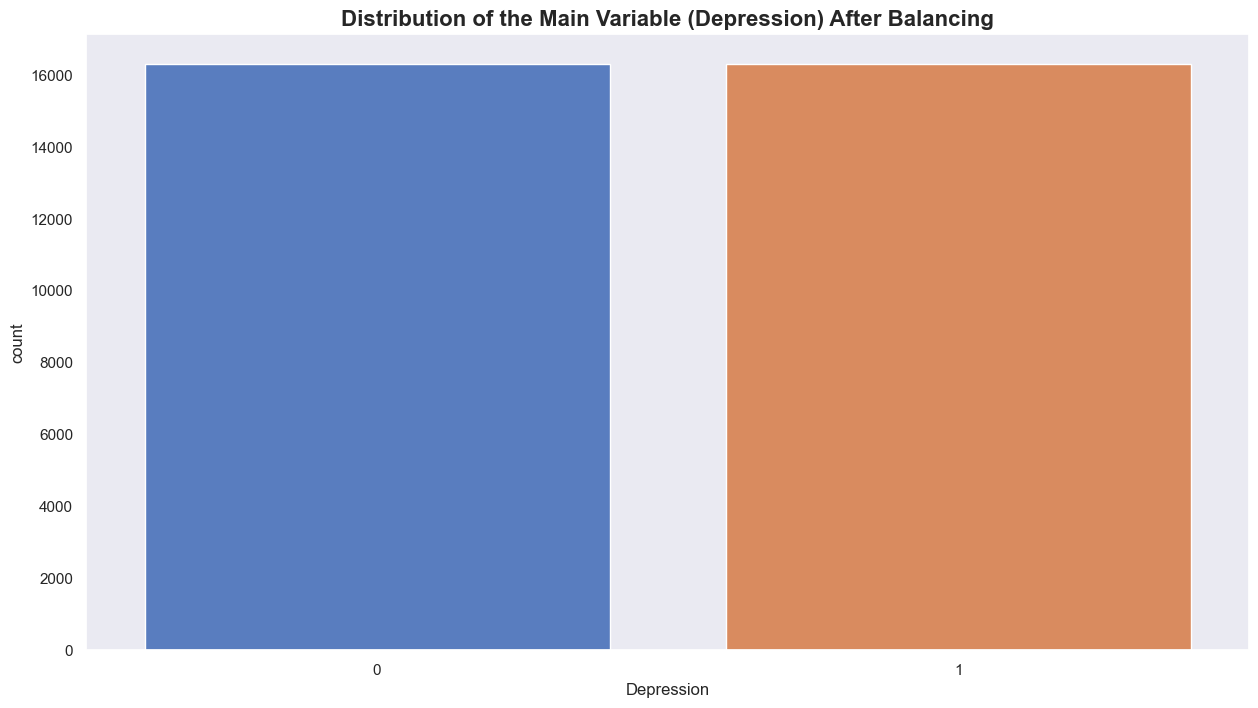

In [135]:
plt.subplots(figsize=(15,8))
sns.countplot(data=df_resampled, x="Depression",palette="muted")
plt.title("Distribution of the Main Variable (Depression) After Balancing", fontsize=16, fontweight="bold")
plt.show()

## Correlation Between Variables and the Target Variable

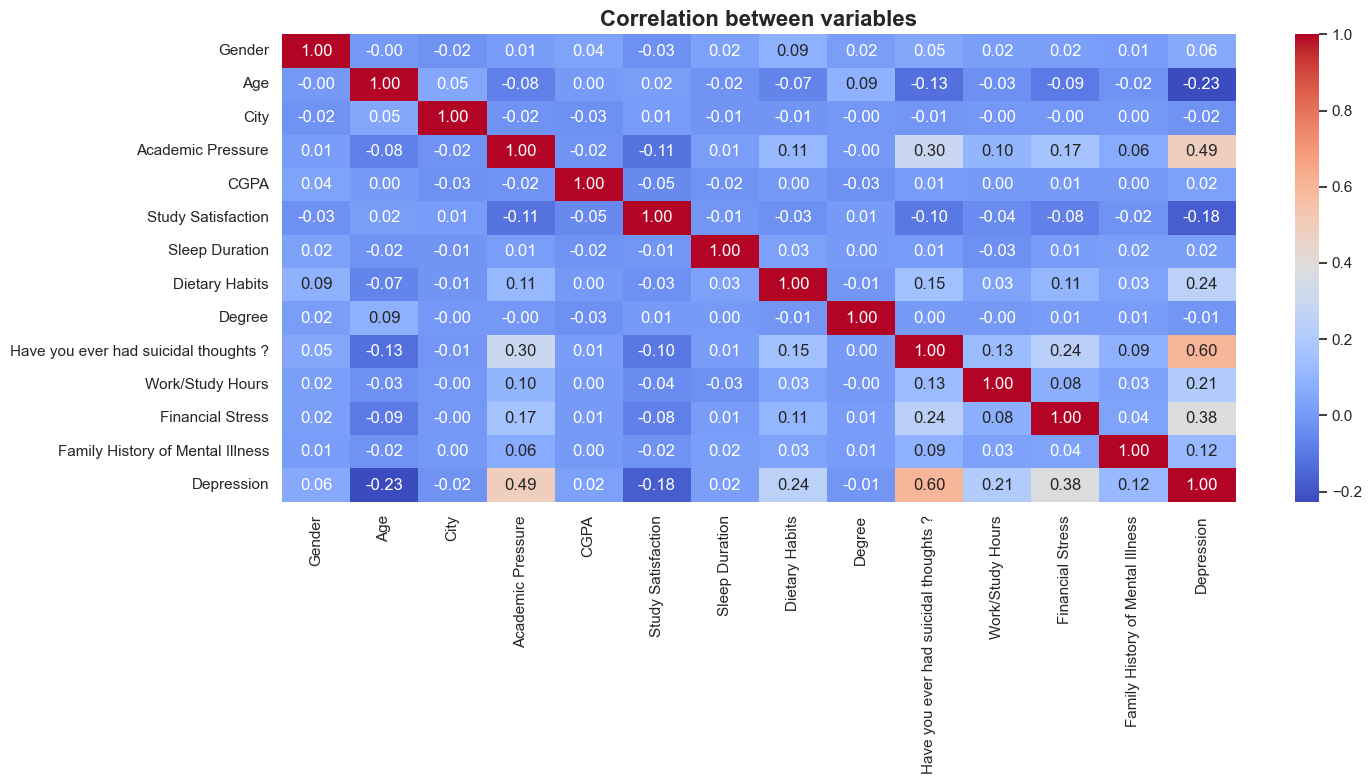

In [136]:
plt.figure(figsize=(15,8))

corr = df_resampled.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation between variables", fontsize=16, fontweight="bold")

plt.tight_layout()
plt.show()

### Correlation between variables and the target

> As seen in the previous graphs and based on the correlation matrix, we can highlight the following insights regarding the target variable **"Depression"**:

- **Suicidal thoughts (r = 0.60):** Strongest correlation with depression, indicating that individuals with suicidal thoughts are strongly associated with depressive symptoms.
- **Academic pressure (r = 0.49):** Moderately correlated, suggesting that higher levels of academic pressure are linked to a higher likelihood of depression.
- **Financial stress (r = 0.38):** Positive correlation, showing that financial difficulties may contribute to depressive symptoms.
- **Dietary habits (r = 0.24):** Weak but relevant link, indicating that dietary factors influence mental health.
- **Age (r = -0.23):** Negative correlation, suggesting that younger individuals are more likely to exhibit depressive symptoms.
- **Sleep duration (r = -0.18):** Negative link, showing that shorter sleep duration is associated with depression.
- Variables such as **Gender**, **City**, and **Degree** show little to no relationship with depression.


# Feature Importance

In [137]:
from sklearn.feature_selection import mutual_info_classif

In [138]:
df_feat_imp = df_resampled.copy(deep = True)

x = df_feat_imp.drop(columns=["Depression"],axis=1)
y= df_feat_imp["Depression"]

X_ftrain, X_ftest, y_ftrain, y_ftest = train_test_split(x,y,test_size = 0.2, random_state = 42)

In [139]:
mi_score = mutual_info_classif(X_ftrain, y_ftrain)

In [140]:
mi_score_df = pd.DataFrame({"Feature":X_ftrain.columns, "Mi Score": mi_score}).sort_values(by="Mi Score",ascending=False)

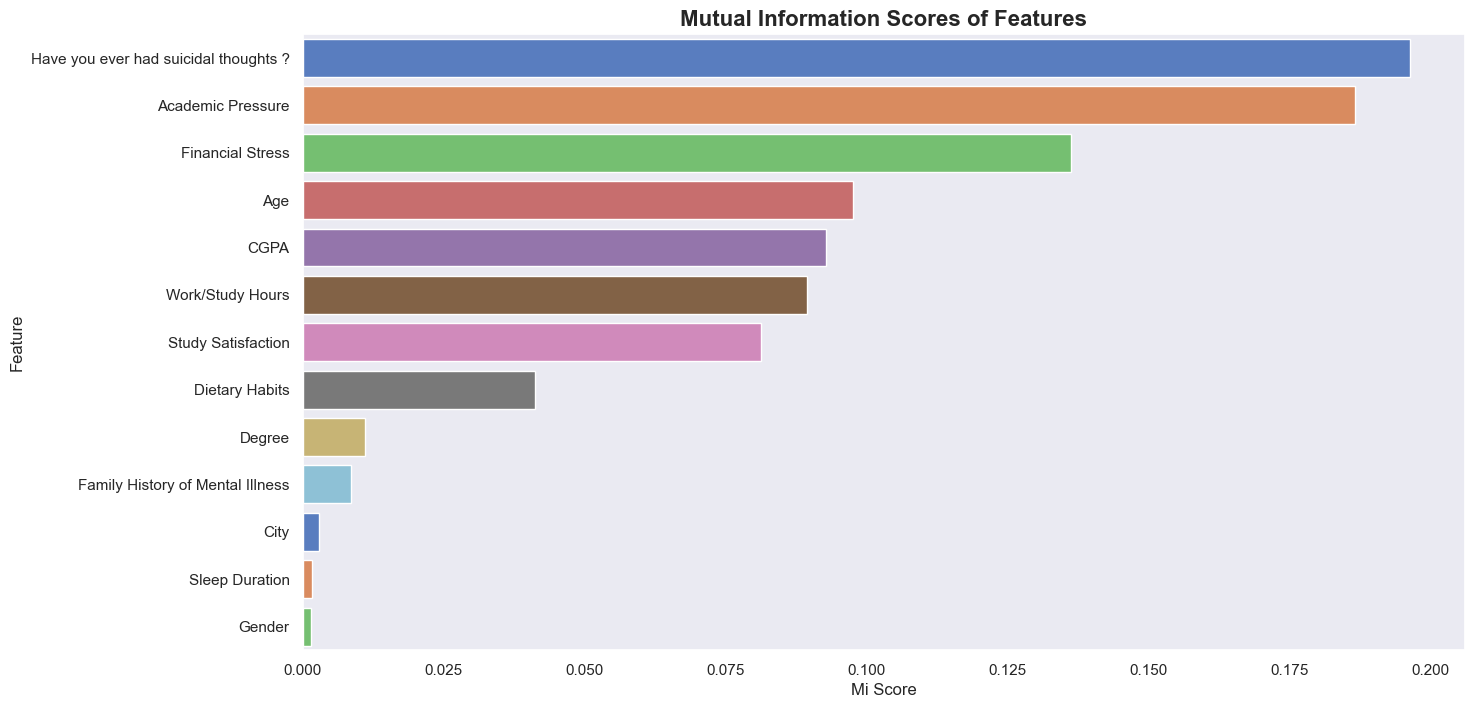

In [141]:
plt.figure(figsize=(15,8))
sns.barplot(mi_score_df, y="Feature", x="Mi Score", palette="muted")
plt.title("Mutual Information Scores of Features", fontsize=16, fontweight="bold")
plt.show()

## Splitting the Data into Train and Test Sets

In [202]:
from sklearn.model_selection import train_test_split

In [142]:
#Dropping the columns with less importance as seen previously
x = df_resampled.drop(columns=["Depression", "Family History of Mental Illness", "Sleep Duration", "Gender",
                               "City", "Degree"],axis=1)
y = df_resampled["Depression"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=42)

## Normalizing the Data
- Scaling improves the performance of models sensitive to the magnitude of the data. It's essential to scale both training and test data without information leakage to simulate the real-world use of the model with new and unseen data.

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.fit_transform(x_test)

# Machine Learning Models

In [203]:
# Machine Learning Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier 
from sklearn.linear_model import LogisticRegression  
from sklearn.tree import DecisionTreeClassifier 
from catboost import CatBoostClassifier
from sklearn.svm import SVC  
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier   

In [180]:
# Models with tuned parameters to avoid overfitting
models = [
    RandomForestClassifier(n_estimators=200, max_depth=7, min_samples_split=5, min_samples_leaf=2),
    GradientBoostingClassifier(n_estimators=200, learning_rate=0.01, max_depth=5, subsample=0.8),
    AdaBoostClassifier(n_estimators=200, learning_rate=0.1),
    LogisticRegression(C=0.1, penalty='l2', solver='liblinear'),
    DecisionTreeClassifier(max_depth=5, min_samples_split=10, min_samples_leaf=2),
    GaussianNB(var_smoothing=1e-8), 
    XGBClassifier(n_estimators=200, learning_rate=0.01, max_depth=3, subsample=0.8),
    CatBoostClassifier(task_type='CPU', iterations=100, learning_rate=0.1, max_depth=5, eval_metric='Accuracy')
]

In [204]:
# Metrics to Evaluate Models
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score
from sklearn.model_selection import cross_val_score

In [ ]:
metrics = []

for i, model in enumerate(models):
    model_name = model.__class__.__name__
    model.fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, pred_train)
    test_accuracy = accuracy_score(y_test, pred_test)
    train_recall = recall_score(y_train, pred_train)
    test_recall = recall_score(y_test, pred_test)
    train_precision = precision_score(y_train, pred_train)
    test_precision = precision_score(y_test, pred_test)
    train_f1 = f1_score(y_train, pred_train)
    test_f1 = f1_score(y_test, pred_test)
    cross_val_mean = cross_val_score(model, X=X_train, y=y_train, scoring="accuracy", cv=5).mean()
    
    metrics.append({
        "Model": model_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Train Recall": train_recall,
        "Test Recall": test_recall,
        "Train Precision": train_precision,
        "Test Precision": test_precision,
        "Train F1": train_f1,
        "Test F1": test_f1,
        "Cross Val Mean": cross_val_mean
    })

In [192]:
# KNN Model
best_results_knn = {"Test Accuracy" : 0}

for i in range(1,40,2):
    model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred_test)
    
    if test_accuracy > best_results_knn["Test Accuracy"]:
        best_results_knn = {
            "Model": f"KNN (n_neighbord = {i})",
            "Train Accuracy": accuracy_score(y_train, pred_train),
            "Test Accuracy": test_accuracy,
            "Train Recall": recall_score(y_train, pred_train),
            "Test Recall": recall_score(y_test, pred_test),
            "Train Precision": precision_score(y_train, pred_train),
            "Test Precision": precision_score(y_test, pred_test),
            "Train F1": f1_score(y_train, pred_train),
            "Test F1": f1_score(y_test, pred_test),
            "Cross Val Mean": cross_val_score(model, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring="accuracy").mean()
        }
metrics.append(best_results_knn)

In [195]:
# SVC Model
best_results_svc = {"Test Accuracy" : 0}
kernels = ["linear", "poly", "rbf", "sigmoid"]

for kernel in kernels:
    model = SVC(kernel = kernel).fit(X_train, y_train)
    
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, pred_test)
    
    if test_accuracy > best_results_svc["Test Accuracy"]:
        best_results_svc = {
            "Model": f"SVC (kernel = {kernel})",
            "Train Accuracy": accuracy_score(y_train, pred_train),
            "Test Accuracy": test_accuracy,
            "Train Recall": recall_score(y_train, pred_train),
            "Test Recall": recall_score(y_test, pred_test),
            "Train Precision": precision_score(y_train, pred_train),
            "Test Precision": precision_score(y_test, pred_test),
            "Train F1": f1_score(y_train, pred_train),
            "Test F1": f1_score(y_test, pred_test),
            "Cross Val Mean": cross_val_score(model, X=X_train, y=y_train, cv=5, n_jobs=-1, scoring="accuracy").mean()
        }
metrics.append(best_results_svc)

In [196]:
results_df = pd.DataFrame(metrics)
pd.set_option("display.float_format", "{:.2f}".format)

In [197]:
display(results_df)

,Model,Train Accuracy,Test Accuracy,Train Recall,Test Recall,Train Precision,Test Precision,Train F1,Test F1,Cross Val Mean
0,RandomForestClassifier,0.87,0.85,0.88,0.81,0.86,0.88,0.87,0.84,0.86
1,GradientBoostingClassifier,0.87,0.85,0.88,0.81,0.85,0.87,0.87,0.84,0.86
2,AdaBoostClassifier,0.86,0.85,0.87,0.82,0.86,0.88,0.86,0.85,0.86
3,LogisticRegression,0.86,0.86,0.86,0.87,0.85,0.85,0.86,0.86,0.85
4,DecisionTreeClassifier,0.85,0.84,0.84,0.80,0.86,0.86,0.85,0.83,0.84
5,GaussianNB,0.85,0.85,0.85,0.86,0.85,0.85,0.85,0.85,0.85
6,XGBClassifier,0.85,0.84,0.87,0.84,0.83,0.84,0.85,0.84,0.85
7,CatBoostClassifier,0.87,0.86,0.88,0.82,0.86,0.88,0.87,0.85,0.87
8,KNN (n_neighbord = 31),0.86,0.85,0.87,0.86,0.85,0.85,0.86,0.86,0.85
9,SVC (kernel = linear),0.86,0.86,0.87,0.87,0.85,0.85,0.86,0.86,0.85


- Choice of CatBoostClassifier

The **CatBoostClassifier** was chosen due to its excellent performance across all metrics, with high **accuracy**, **recall**, **F1**, and **cross-validation** scores. It stands out primarily for:

- **Consistency in performance**: It shows strong results on both training and testing data.
- **Balanced metrics**: High values in both **train** and **test recall** and **precision**, suggesting it is effective at correctly identifying both positive and negative classes.
- **High cross-validation performance**: The model shows a good **cross-validation score**, indicating it is stable and generalizes well to different data subsets.

# Hiperparameter Tuning

In [201]:
from sklearn.model_selection import GridSearchCV

In [186]:
param_grid = {
    'iterations':[100, 150, 200], 
    'learning_rate':[0.02, 0.05, 0.1], 
    'max_depth':[3, 5, 7],
    'random_state':[1, 5, 42] 
}

In [ ]:
catboost_model = CatBoostClassifier(task_type='CPU', eval_metric='Accuracy')

grid = GridSearchCV(catboost_model, param_grid, scoring='roc_auc', cv=3, n_jobs=-1, verbose=1).fit(x_train, y_train)

In [200]:
print("Best Params:", grid.best_params_)
print(f"Best Score: {grid.best_score_:.2f}")

Best Params: {'iterations': 200, 'learning_rate': 0.1, 'max_depth': 3, 'random_state': 1}
Best Score: 0.94


### Grid Search Results: CatBoostClassifier

The **Grid Search** process for the **CatBoostClassifier** achieved an impressive **Best Score of 0.94** using the AUC-ROC metric. This result indicates that the model is highly effective at distinguishing between positive and negative classes, making it well-suited for the classification task at hand.

#### Key Takeaways:
- The high AUC-ROC score demonstrates the model's ability to generalize well on unseen data.
- The chosen hyperparameters optimize the trade-off between underfitting and overfitting, achieving a balance between training and test performance.
- The success of this process confirms that the objective of tuning the CatBoostClassifier for optimal performance has been achieved.

>This outcome validates the use of **GridSearchCV** to fine-tune the model and ensures it is ready for deployment or further validation on new datasets, successfully achieving the project’s goal.